## Neural Networks

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

df= pd.read_csv("clean_PCOS_data.csv")

In [2]:
from sklearn.model_selection import train_test_split

# Defining the feature and target variable
X = df.drop('PCOS(Y/N)', axis=1)  # all features except the target
y = df['PCOS(Y/N)']  # the target variable

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 378 samples
Testing set size: 163 samples


In [3]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_df

Patient_File_No.  Age (yrs)  Weight(Kg)  Height(Cm)       BMI  \
0            1.011699  -0.634606   -1.056186   -1.407579 -0.594261   
1            0.640316  -0.634606   -0.148588    1.246717 -0.668310   
2           -1.363872   0.845230   -0.148588   -0.744005  0.195593   
3            0.396996  -0.819586   -0.057828    0.251356 -0.174651   
4           -1.575176   0.475271    0.305211    0.251356  0.220276   
..                ...        ...         ...         ...       ...   
373         -1.274228  -0.449627    0.123692   -0.909898  0.615203   
374         -1.050118  -0.634606    0.032932    0.583143 -0.224017   
375          0.000000  -0.264647   -0.411791    1.850569 -1.161969   
376          1.056521  -0.264647    0.395971    2.242077 -0.544896   
377         -1.075730   1.215189    0.423199   -1.241685  1.158228   

     Blood_Group  Pulse rate(bpm)  Respiration_Rate(breaths/min)  \
0      -1.523682         0.202501                       0.448119   
1      -0.436199        -0.542757                      -0.737370   
2       0.107542        -0.542757                       0.448119   
3       0.651284        -0.542757                      -0.737370   
4      -1.523682        -0.542757                       0.448119   
..           ...              ...                            ...   
373    -0.436199         0.202501                       0.448119   
374     0.651284        -0.542757                       0.448119   
375    -1.523682        -0.542757                      -0.737370   
376     0.651284        -0.542757                      -0.737370   
377    -1.523682         1.693016                       0.448119   

     Hemoglobin(g/dl)  Cycle(Reg/Irreg)  ...  Pimples(Y/N)  Fast_Food(Y/N)  \
0           -1.151623         -0.622237  ...      1.020544        0.969055   
1            0.474821         -0.622237  ...      1.020544        0.969055   
2           -1.401845         -0.622237  ...     -0.979870       -1.031933   
3           -1.401845         -0.622237  ...      1.020544       -1.031933   
4            0.099488         -0.622237  ...      1.020544        0.969055   
..                ...               ...  ...           ...             ...   
373         -1.401845         -0.622237  ...     -0.979870       -1.031933   
374         -0.400957          1.607103  ...      1.020544       -1.031933   
375          1.100376         -0.622237  ...      1.020544        0.969055   
376         -0.025623         -0.622237  ...      1.020544       -1.031933   
377          2.226375          1.607103  ...      1.020544        0.969055   

     Reg_Exercise(Y/N)  BP_Systolic(mmHg)  BP_Diastolic(mmHg)  \
0            -0.573793          -0.827608           -1.550005   
1             1.742789          -0.827608            0.645159   
2            -0.573793          -0.827608            0.645159   
3            -0.573793          -0.827608           -1.550005   
4            -0.573793           0.921361           -1.550005   
..                 ...                ...                 ...   
373          -0.573793           0.921361           -1.550005   
374          -0.573793           0.921361            0.645159   
375          -0.573793          -0.827608            0.645159   
376           1.742789          -0.827608            0.645159   
377          -0.573793          -0.827608           -1.550005   

     Follicles_Count(Left)  Follicle_Count(Right)  Avg_Follicle_Size(L)(mm)  \
0                 1.152702               0.532080                  1.117396   
1                 2.099362               1.208855                  0.836776   
2                -0.740617              -1.047063                 -0.846943   
3                -0.740617              -0.821471                 -0.285703   
4                -0.503952              -0.144696                  0.836776   
..                     ...                    ...                       ...   
373              -0.267287              -0.144696                 -0.846943 

In [4]:
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_df

Patient_File_No.  Age (yrs)  Weight(Kg)  Height(Cm)       BMI  \
0           -0.262529  -0.634606    1.330798   -0.412218  1.725936   
1           -1.261422  -1.004566    0.940530    1.080823  0.491788   
2            0.525059  -0.819586    0.032932    1.246717 -0.495530   
3           -1.178181  -0.079668    0.395971   -0.080431  0.491788   
4            1.280631   0.475271   -0.693147   -1.241685 -0.224017   
..                ...        ...         ...         ...       ...   
158          0.032016  -0.819586   -1.146946   -0.744005 -0.989189   
159          0.589090   1.955108   -0.874666    0.749036 -1.236018   
160         -1.530354   0.475271   -0.239348   -1.075792  0.244959   
161         -1.005296   0.105312    0.305211    1.246717 -0.224017   
162          0.710750   0.660251    0.032932   -1.739365  0.936081   

     Blood_Group  Pulse rate(bpm)  Respiration_Rate(breaths/min)  \
0      -0.436199        -0.542757                      -0.737370   
1       0.651284        -0.542757                      -0.737370   
2       0.651284        -0.542757                      -0.737370   
3       0.651284         0.202501                      -0.737370   
4      -0.436199         2.438273                       0.448119   
..           ...              ...                            ...   
158     0.651284         0.202501                       0.448119   
159     0.651284         0.202501                      -1.922858   
160    -1.523682        -0.542757                       1.633608   
161     1.738766        -0.542757                      -0.737370   
162     0.651284         3.183531                       0.448119   

     Hemoglobin(g/dl)  Cycle(Reg/Irreg)  ...  Pimples(Y/N)  Fast_Food(Y/N)  \
0           -0.526068         -0.622237  ...     -0.979870        0.969055   
1           -0.776290         -0.622237  ...     -0.979870       -1.031933   
2           -0.526068         -0.622237  ...     -0.979870        0.969055   
3            1.225487          1.607103  ...     -0.979870       -1.031933   
4            1.100376          1.607103  ...     -0.979870        0.969055   
..                ...               ...  ...           ...             ...   
158         -0.526068         -0.622237  ...     -0.979870       -1.031933   
159         -1.401845          1.607103  ...     -0.979870       -1.031933   
160          1.100376         -0.622237  ...      1.020544        0.969055   
161         -0.150735          1.607103  ...      1.020544        0.969055   
162         -1.401845          1.607103  ...     -0.979870        0.969055   

     Reg_Exercise(Y/N)  BP_Systolic(mmHg)  BP_Diastolic(mmHg)  \
0            -0.573793          -0.827608            0.645159   
1            -0.573793          -0.827608            0.645159   
2            -0.573793           0.921361            0.645159   
3            -0.573793           0.921361            0.645159   
4             1.742789          -0.827608            0.645159   
..                 ...                ...                 ...   
158           1.742789           0.921361           -1.550005   
159          -0.573793           0.921361            0.645159   
160          -0.573793          -0.827608            0.645159   
161           1.742789          -0.827608            0.645159   
162          -0.573793           0.921361            0.645159   

     Follicles_Count(Left)  Follicle_Count(Right)  Avg_Follicle_Size(L)(mm)  \
0                -0.030622              -0.370287                 -0.285703   
1                -0.740617              -0.595879                 -1.267872   
2                -0.503952              -0.370287                 -0.005083   
3                 0.442708               0.757671                 -0.005083   
4                 0.442708               0.757671                  0.556156   
..                     ...                    ...                       ...   
158               1.389367               1.885630                  0.275536 

In [5]:
# Building the neural network model
model = Sequential([
    Dense(3, input_dim=X_train.shape[1], activation='relu'),  # One hidden layer with 3 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=50, verbose=0, validation_data=(X_test, y_test))

/Users/juilypachundkar/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test accuracy: 84.66%
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


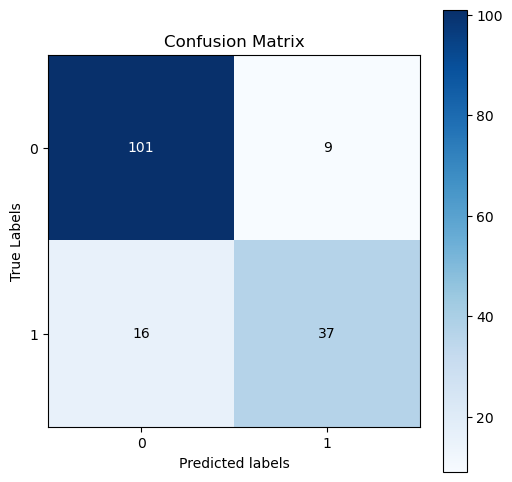

In [6]:
# Evaluating the model using the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {accuracy*100:.2f}%")

# Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True Labels')
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.title('Confusion Matrix')
thresh = cm.max() / 2.  
for i in range(2): 
    for j in range(2):
        color = "white" if cm[i, j] > thresh else "black"
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color=color)

plt.show()

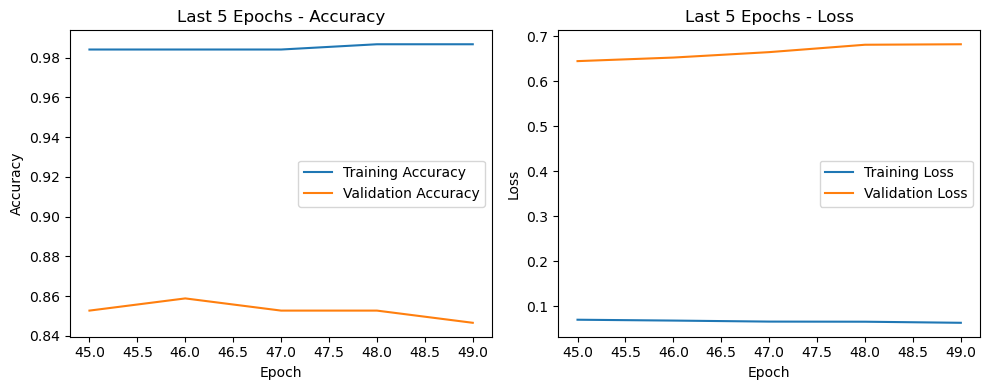

In [7]:
# Plotting the last 5 epochs of training for loss and accuracy
plt.figure(figsize=(10, 4))
epochs = range(len(history.history['accuracy']) - 5, len(history.history['accuracy']))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'][-5:], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'][-5:], label='Validation Accuracy')
plt.title('Last 5 Epochs - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'][-5:], label='Training Loss')
plt.plot(epochs, history.history['val_loss'][-5:], label='Validation Loss')
plt.title('Last 5 Epochs - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

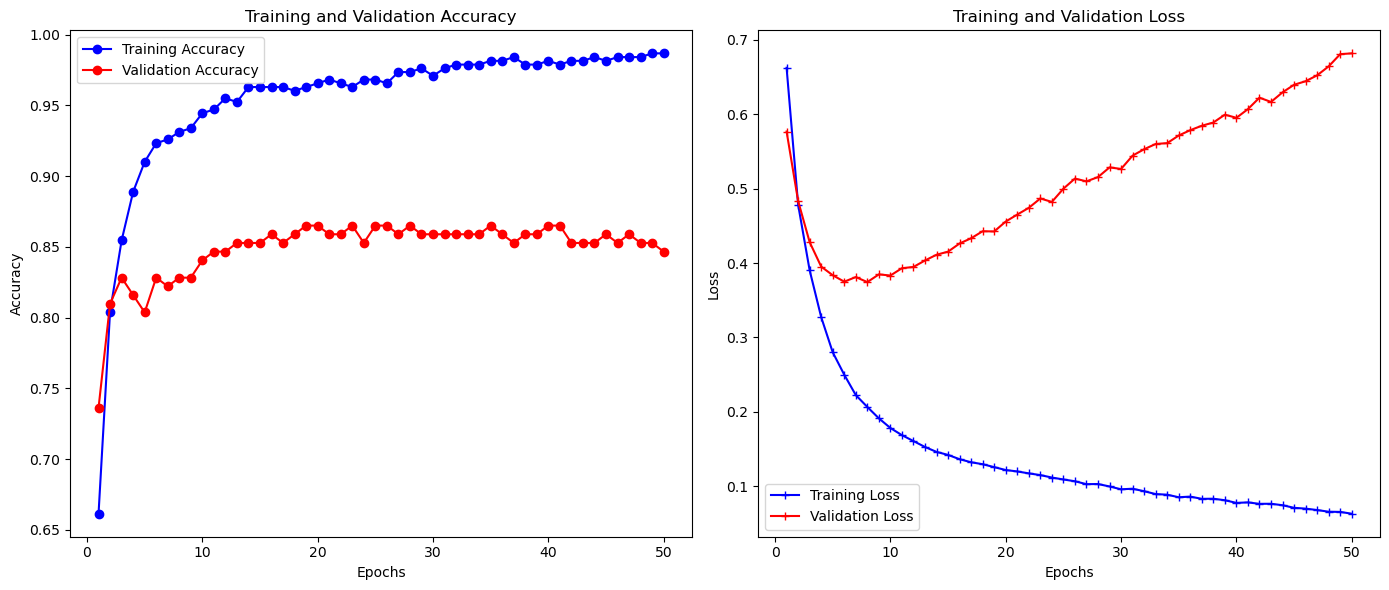

In [8]:
history_dict = history.history  

epochs = range(1, len(history_dict['accuracy']) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['loss'], 'b+-', label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'r+-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Regression

In [9]:
# Select the two continuous variables: "BMI" and "AMH(ng/mL)"
dataset = df[['BMI', 'AMH(ng/mL)']]

# Display the first few rows of the new dataset
dataset


BMI  AMH(ng/mL)
0    19.3        2.07
1    24.9        1.53
2    25.3        6.63
3    29.7        1.22
4    20.1        2.26
..    ...         ...
536  18.5        1.70
537  25.3        5.60
538  23.4        3.70
539  22.2        5.20
540  30.1       20.00

[541 rows x 2 columns]

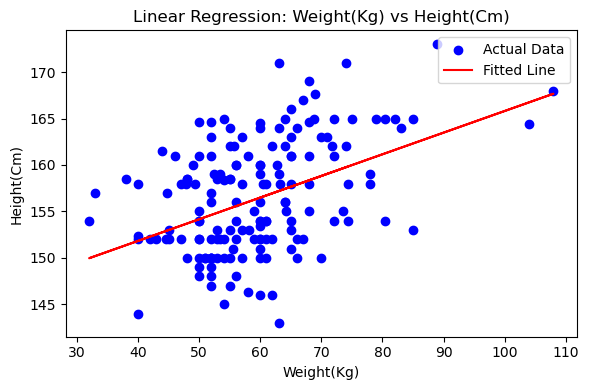

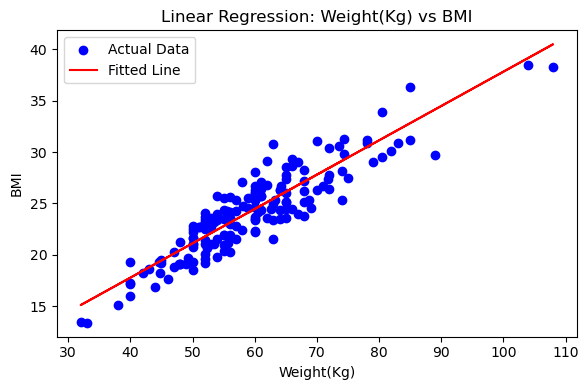

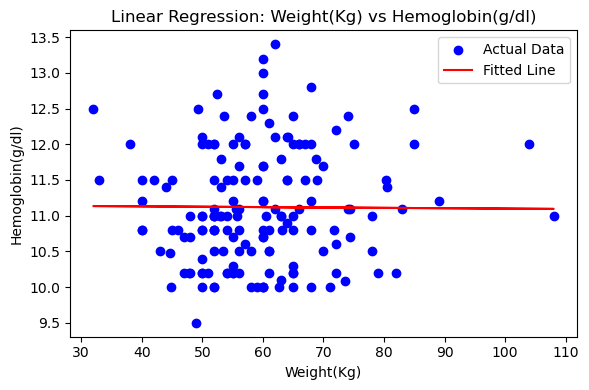

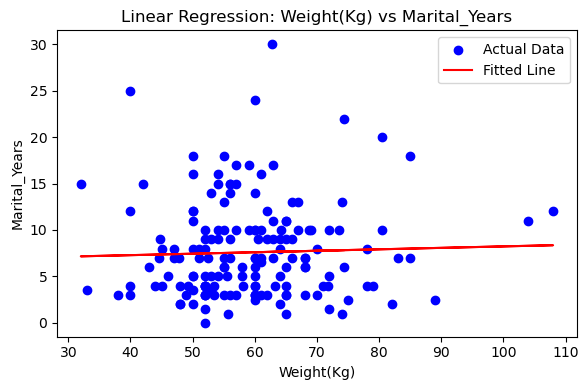

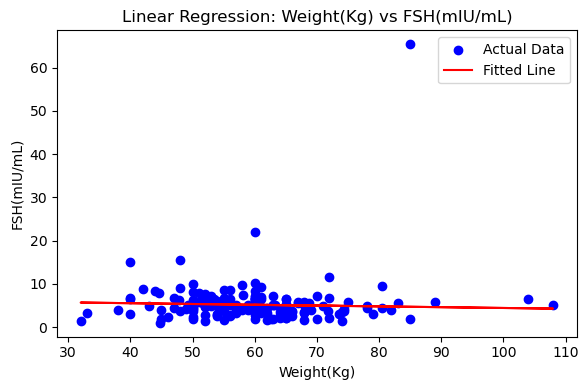

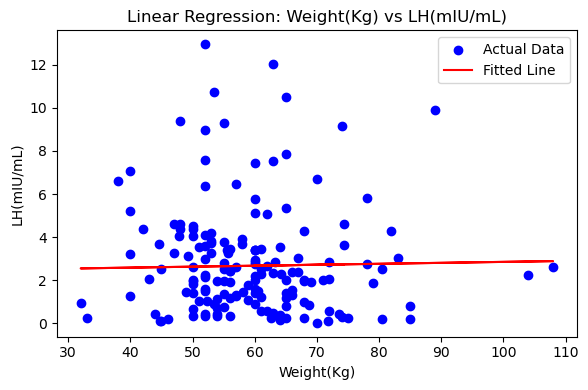

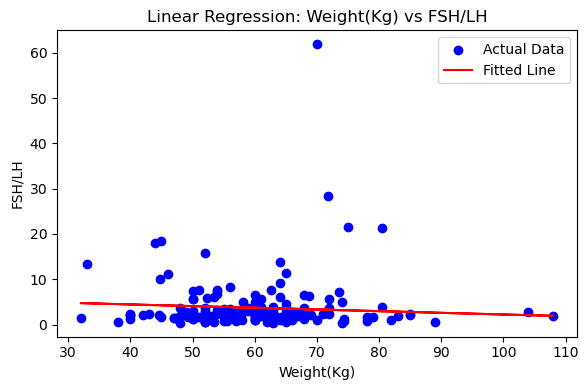

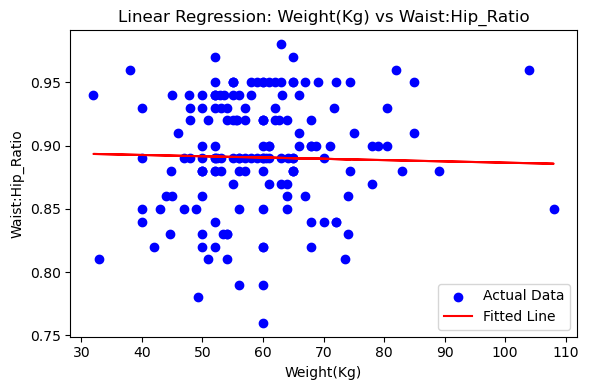

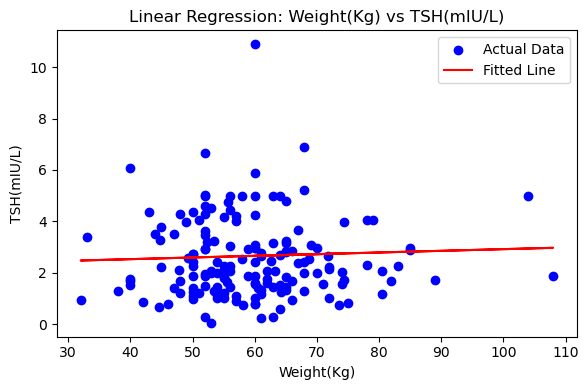

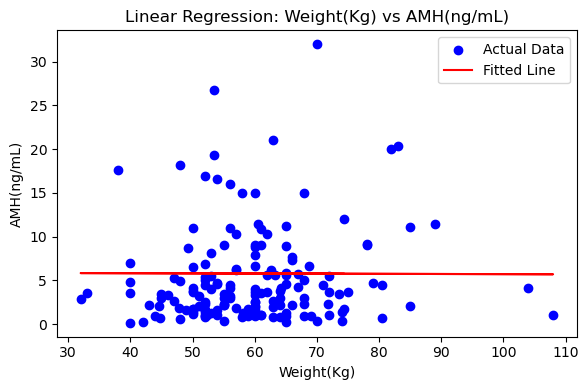

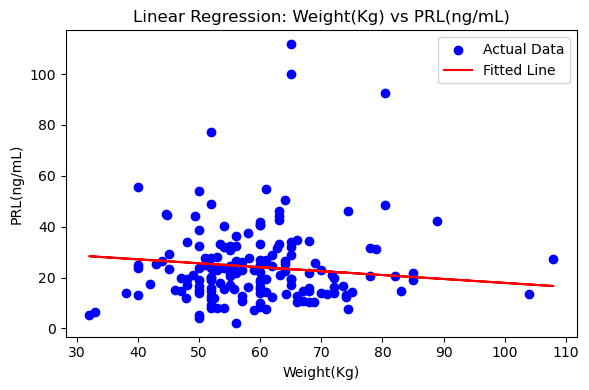

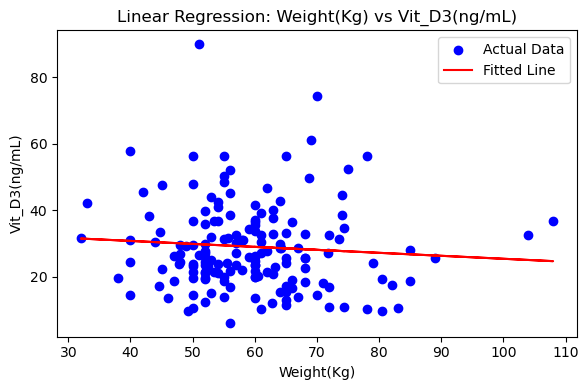

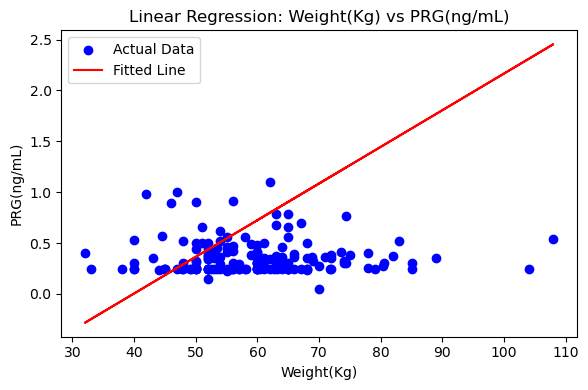

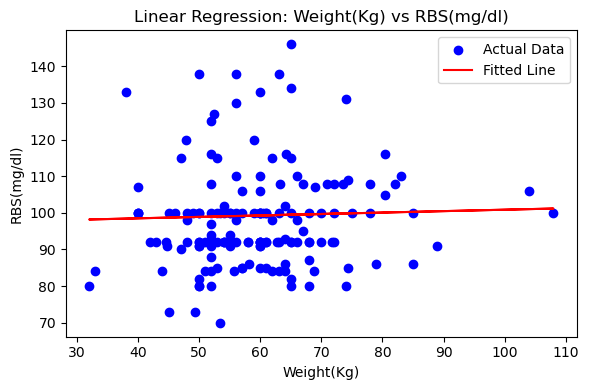

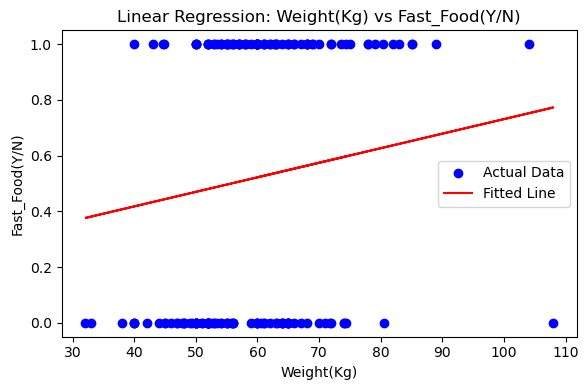

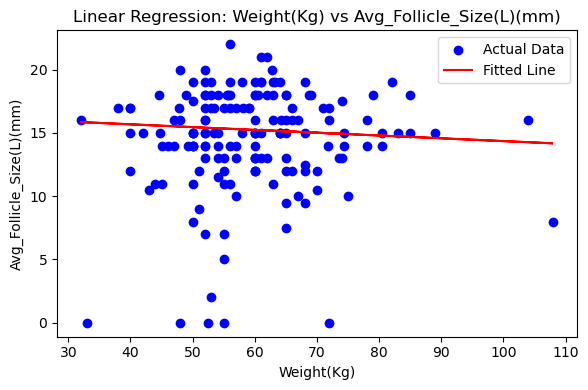

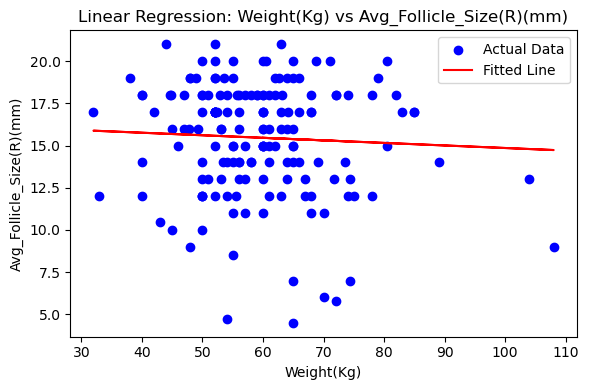

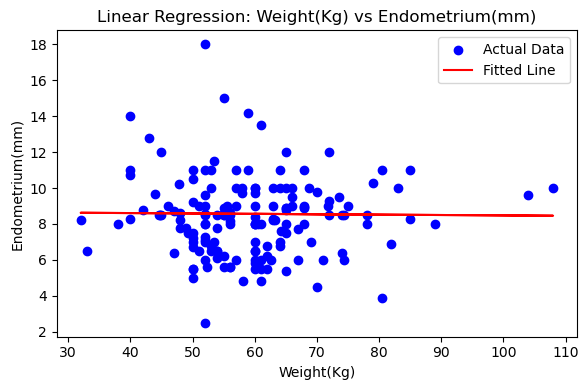

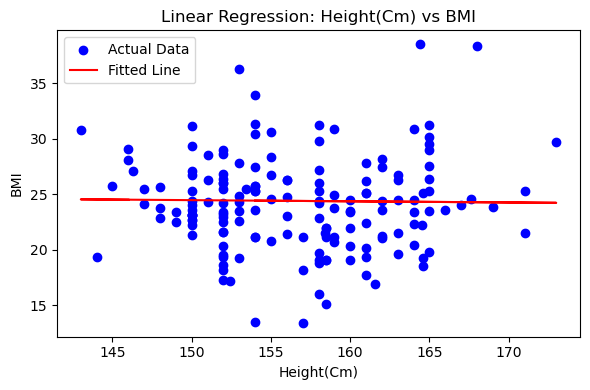

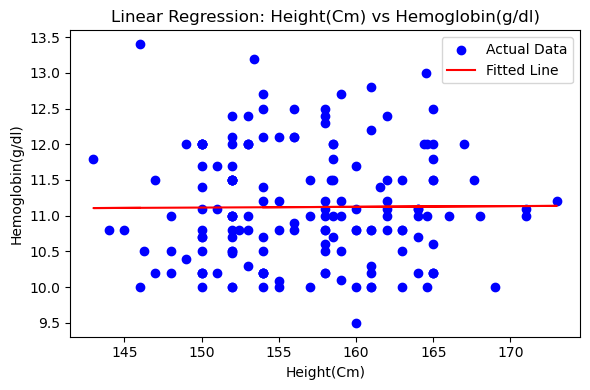

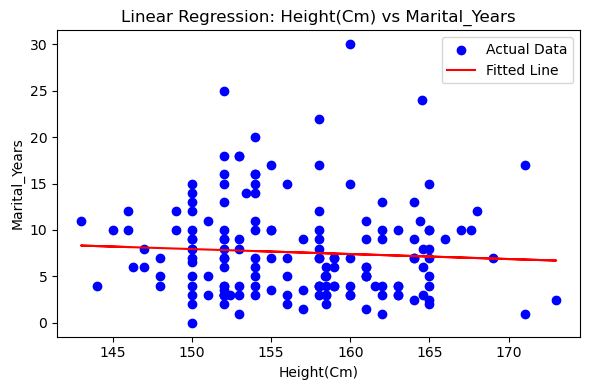

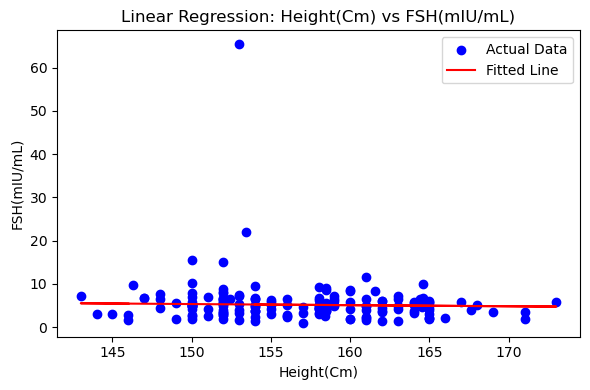

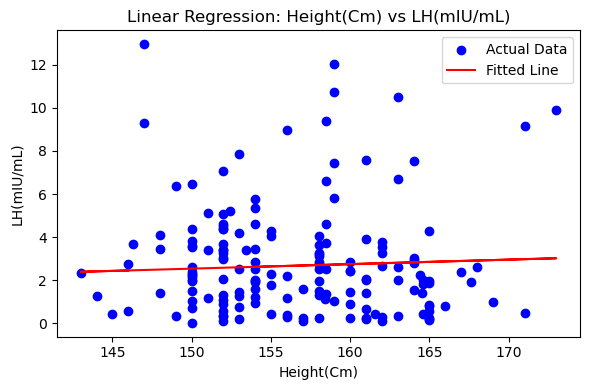

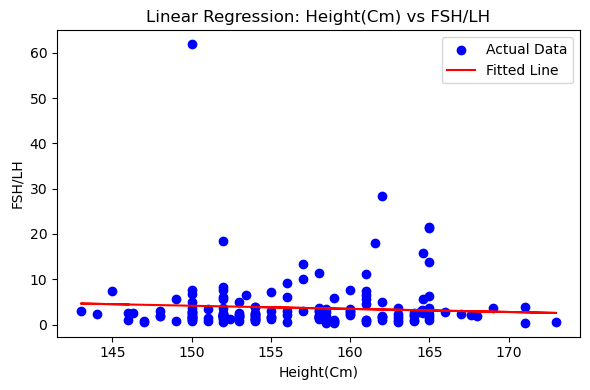

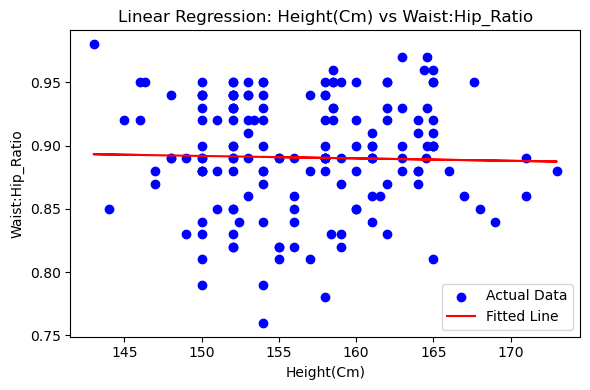

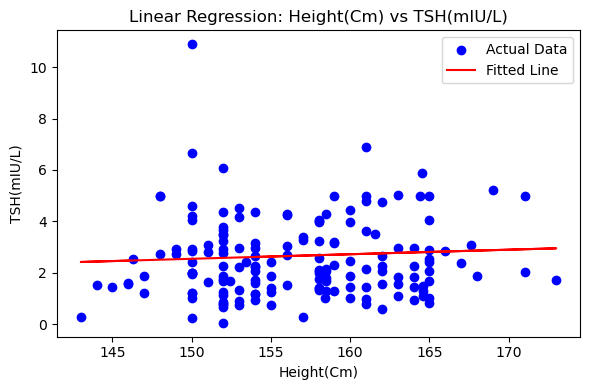

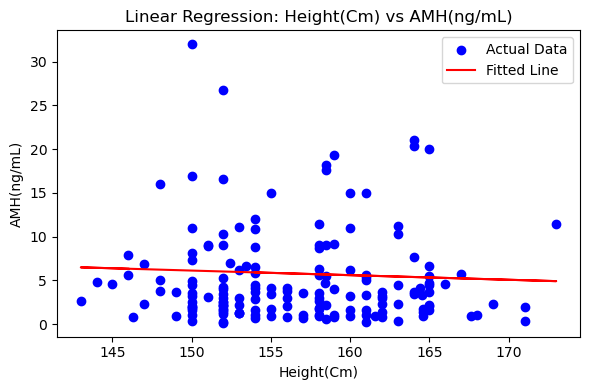

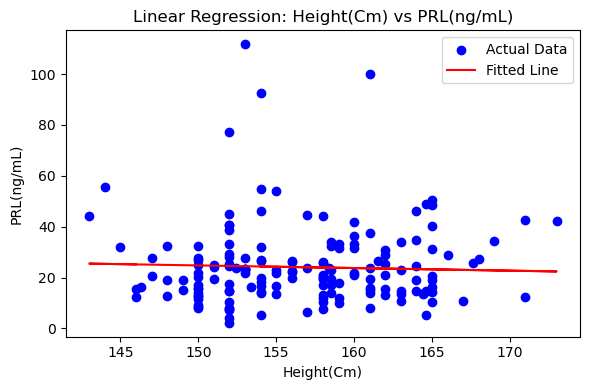

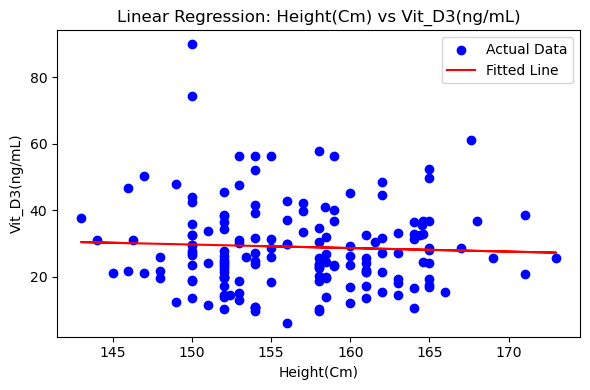

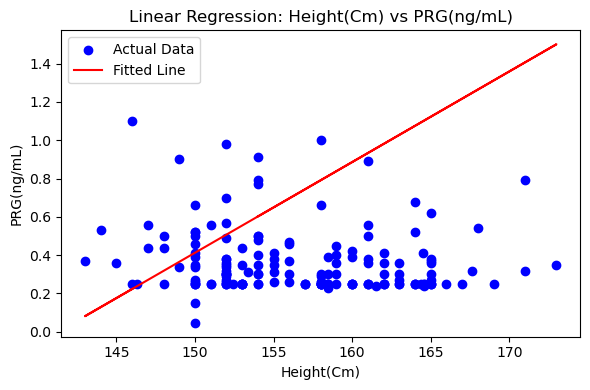

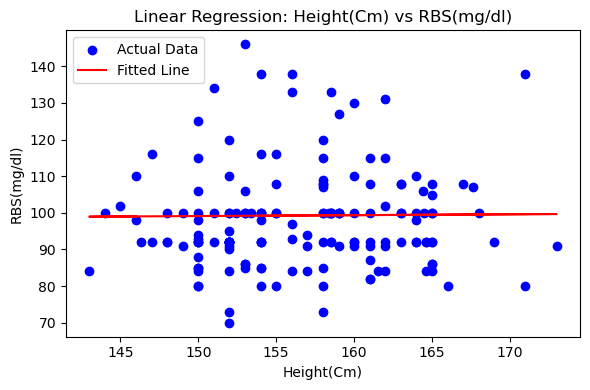

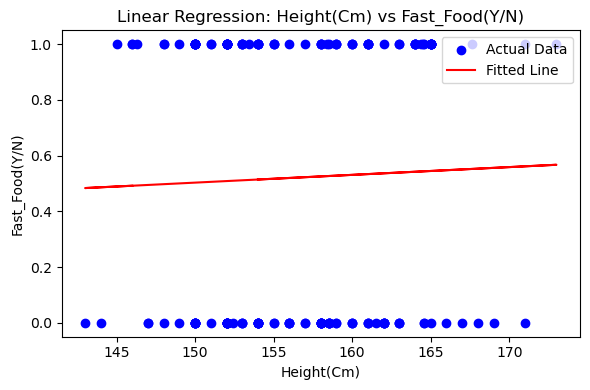

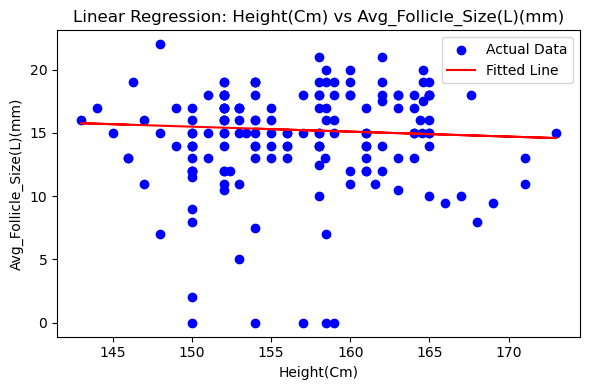

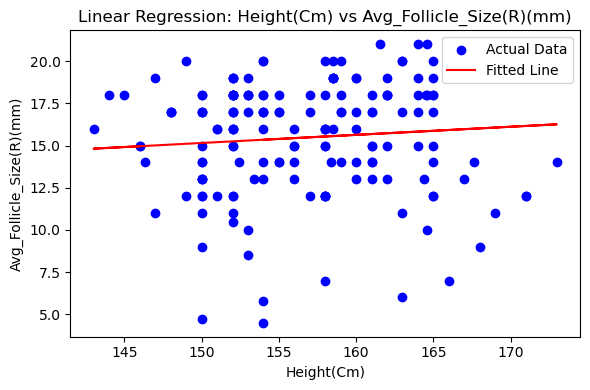

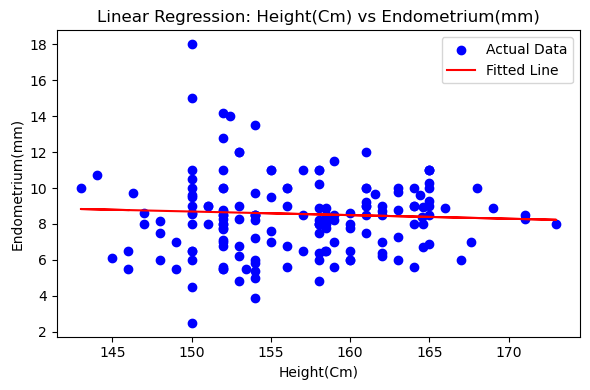

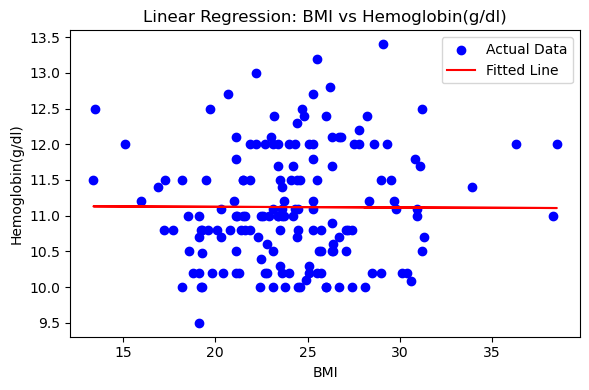

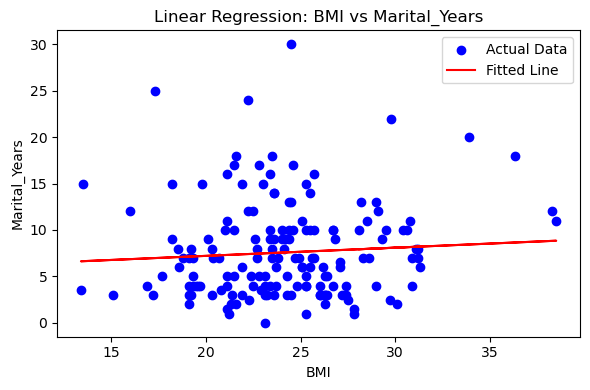

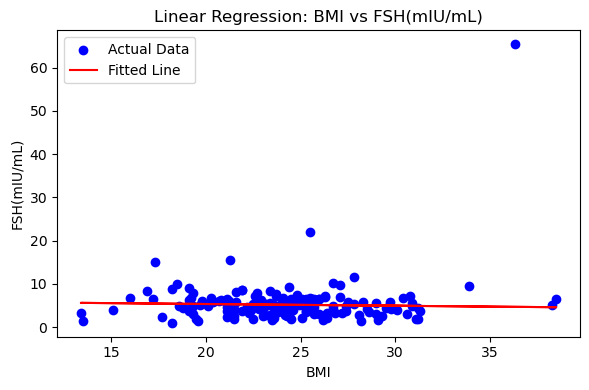

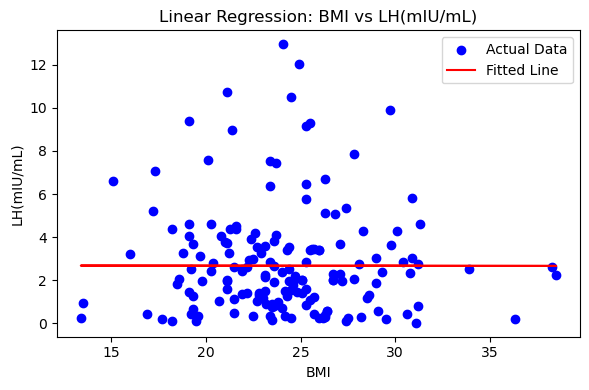

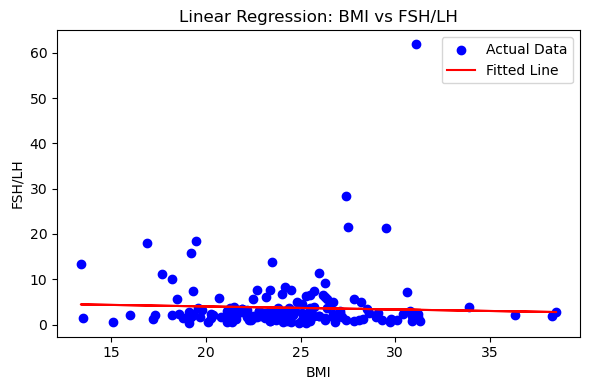

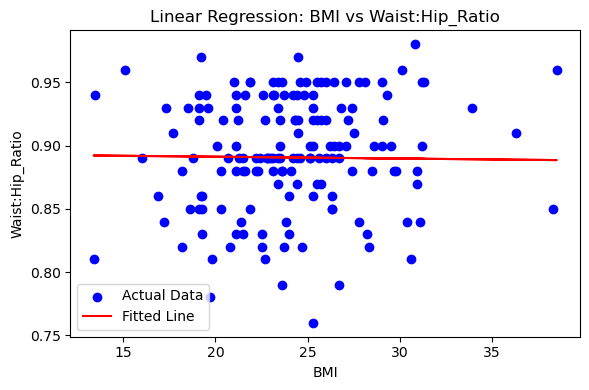

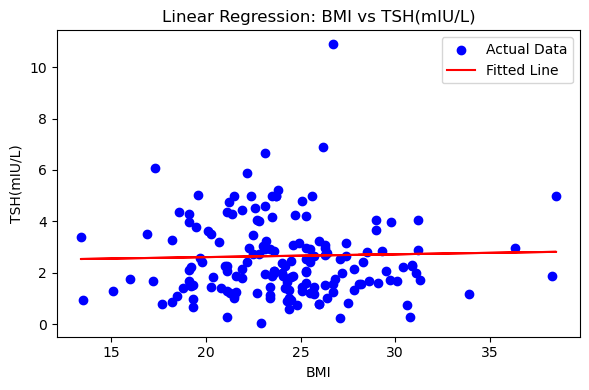

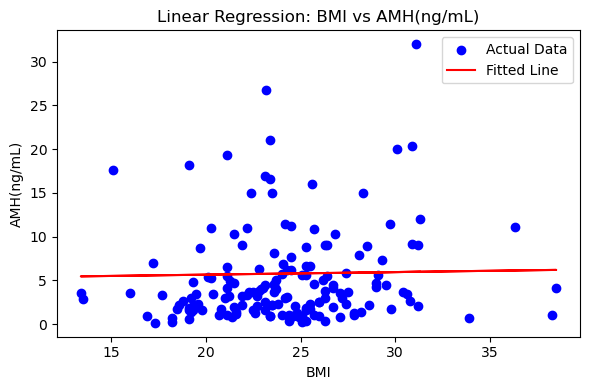

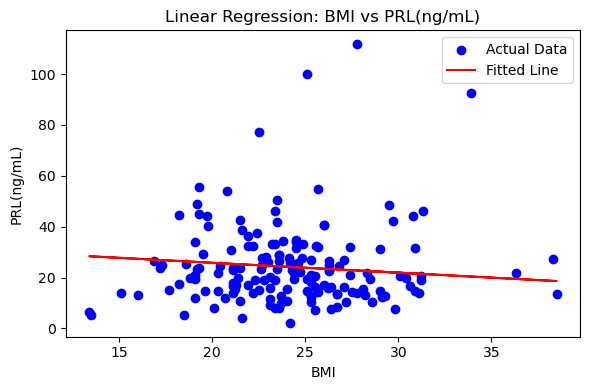

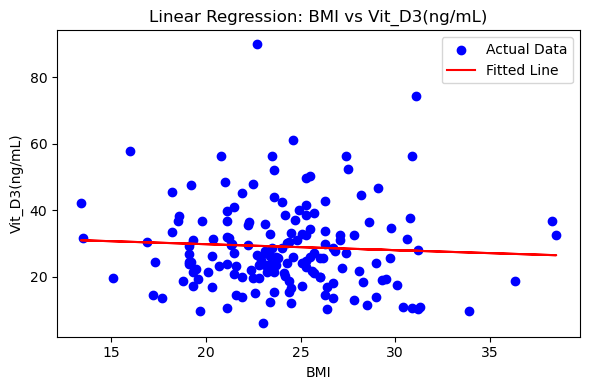

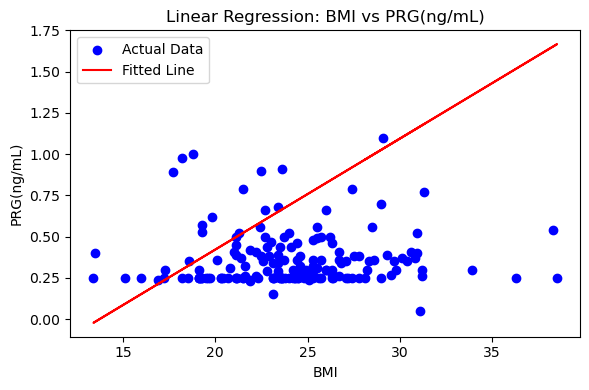

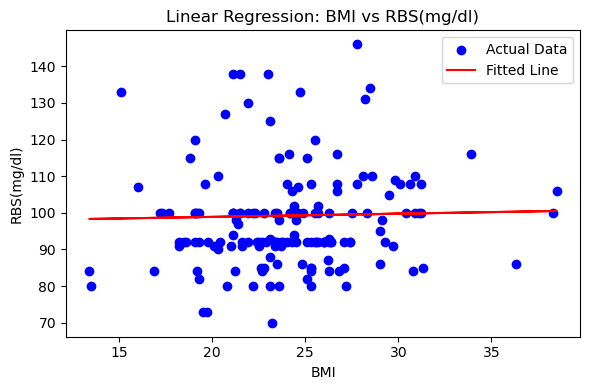

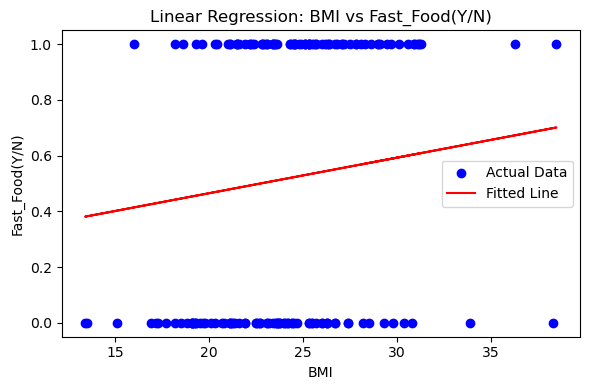

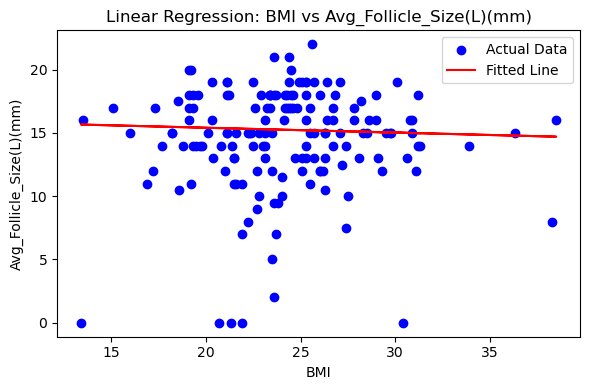

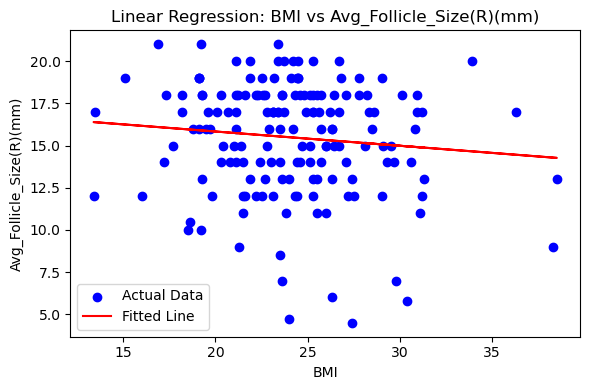

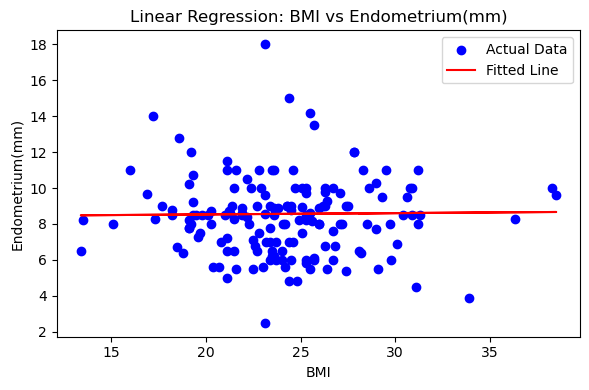

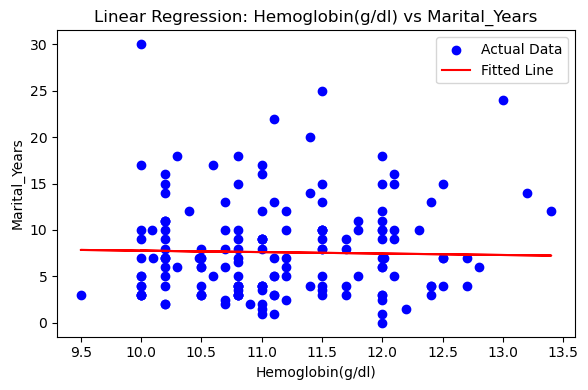

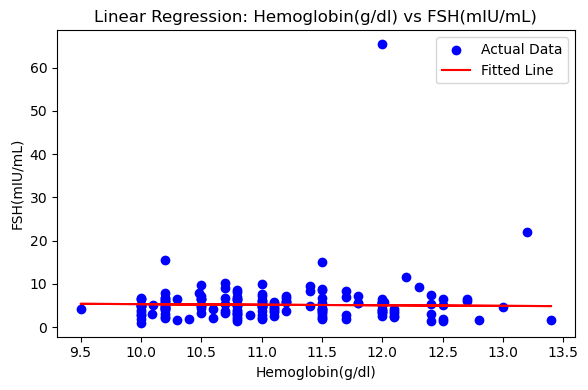

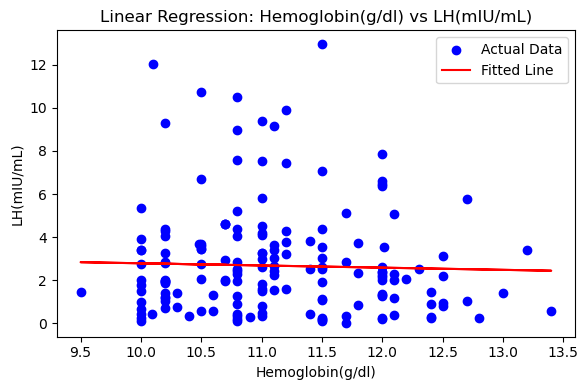

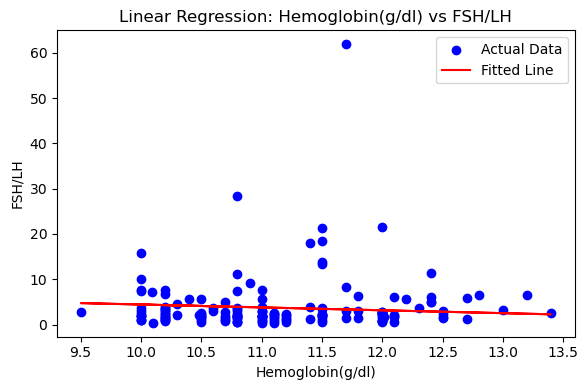

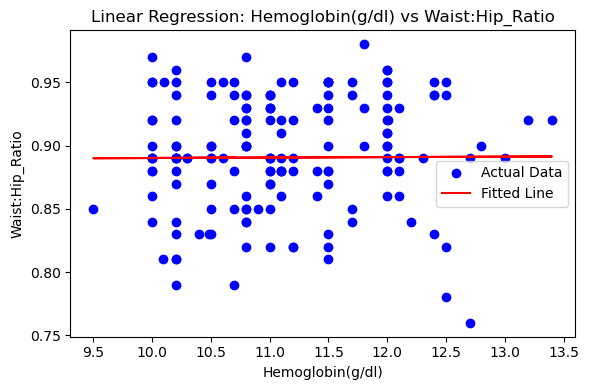

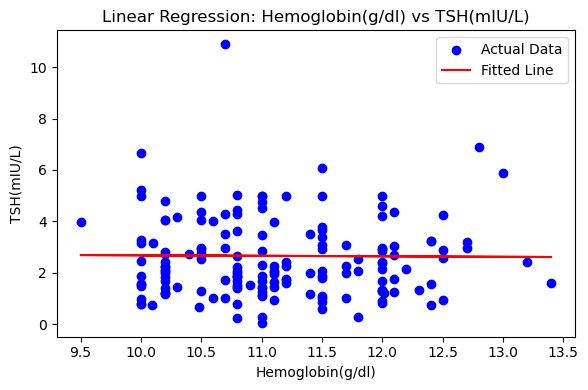

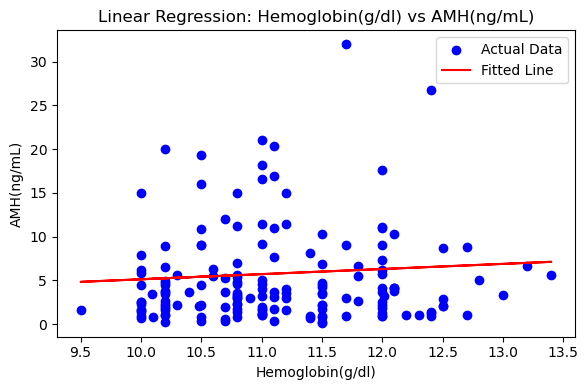

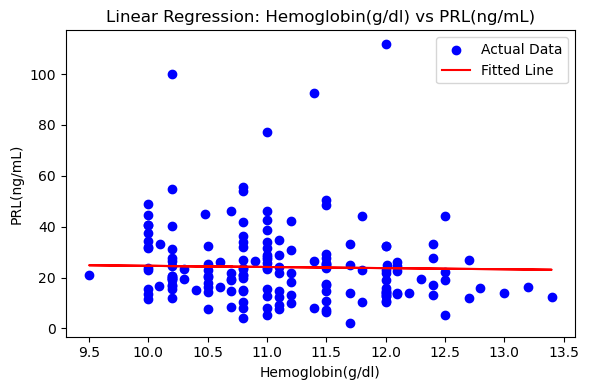

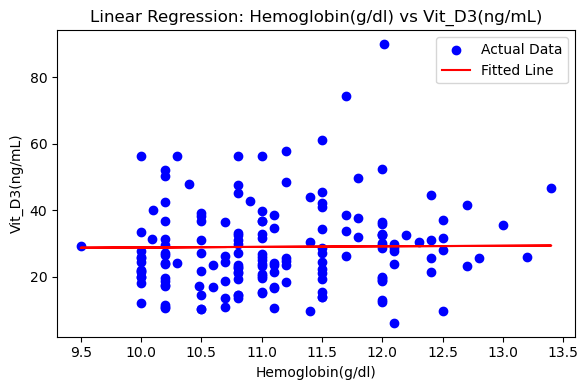

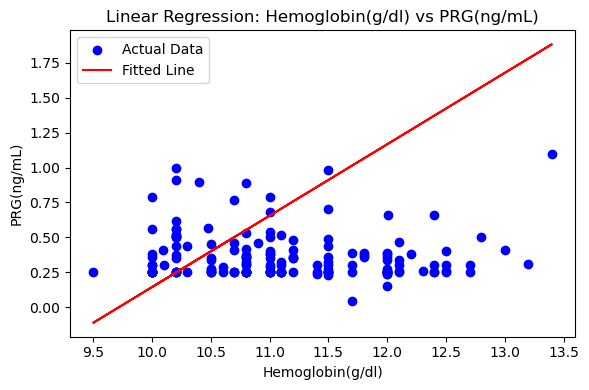

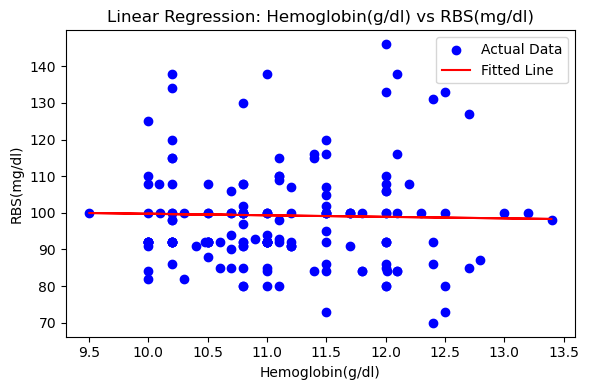

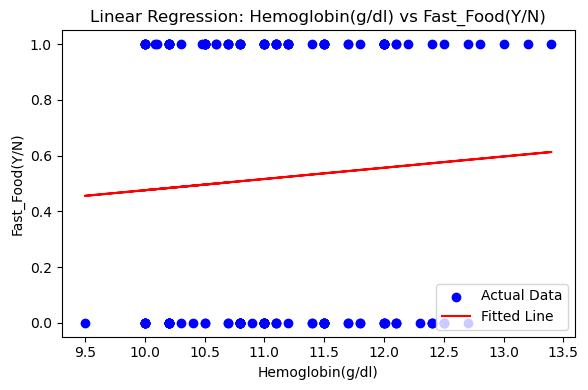

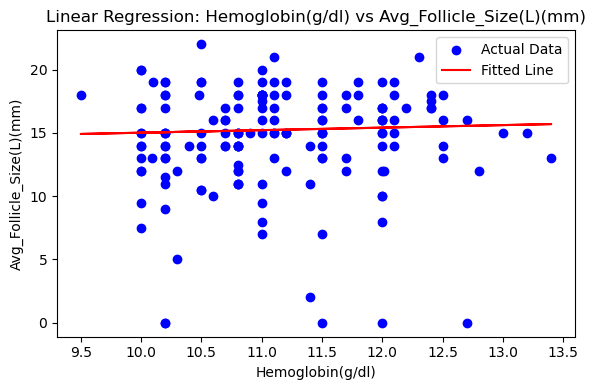

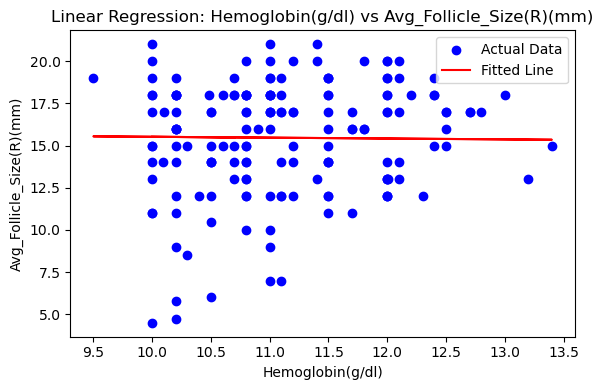

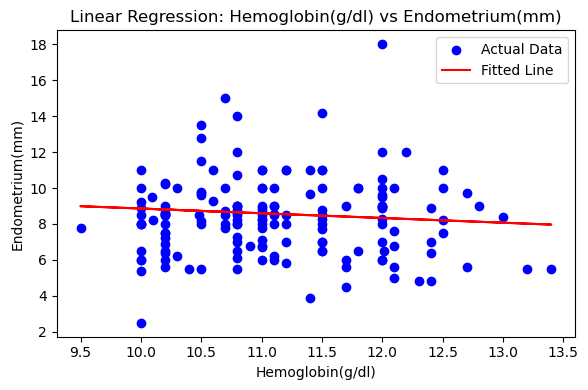

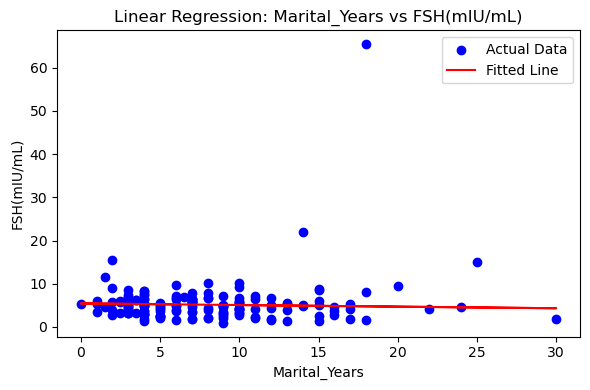

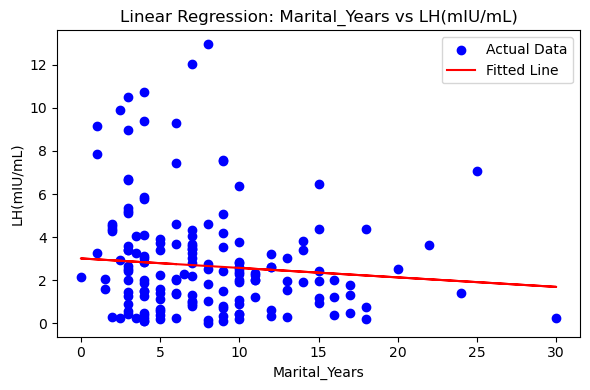

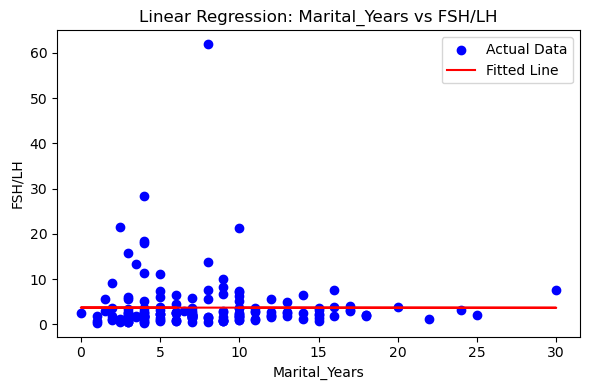

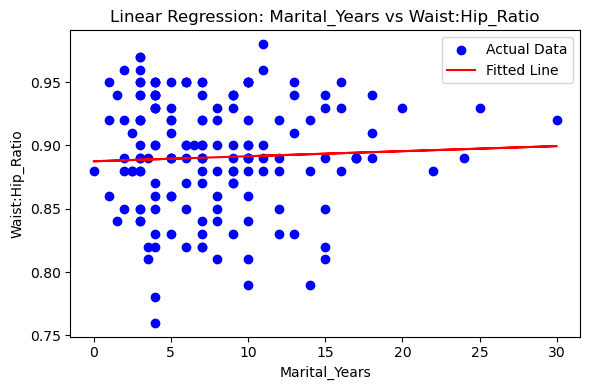

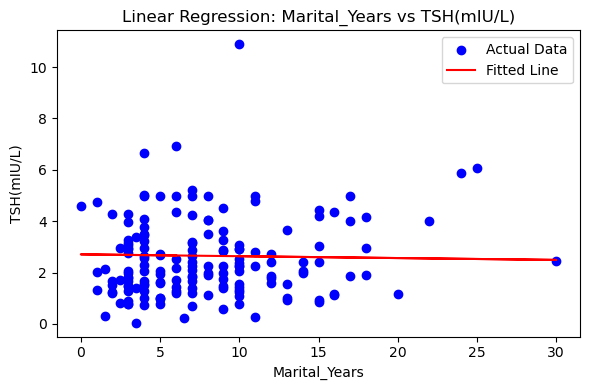

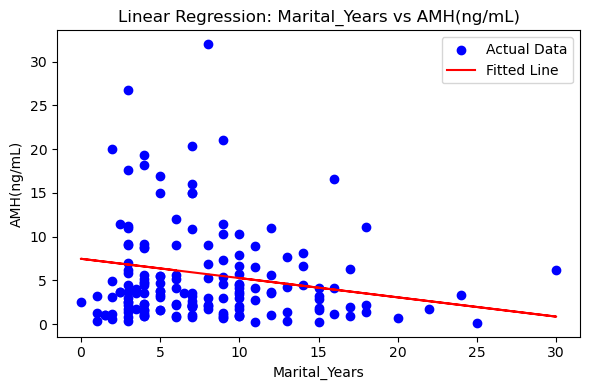

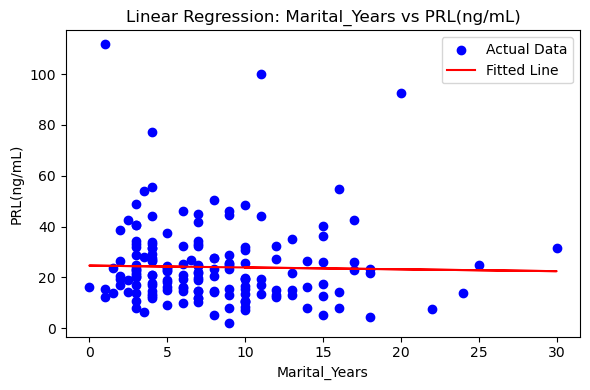

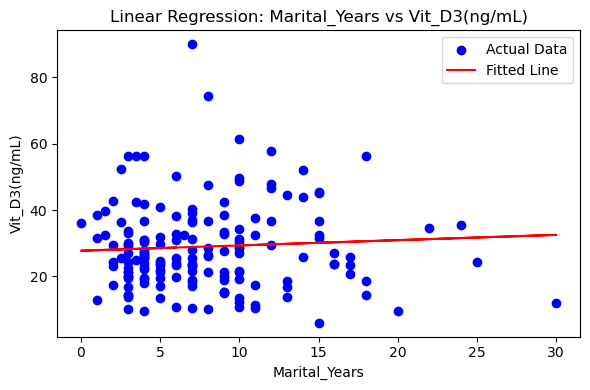

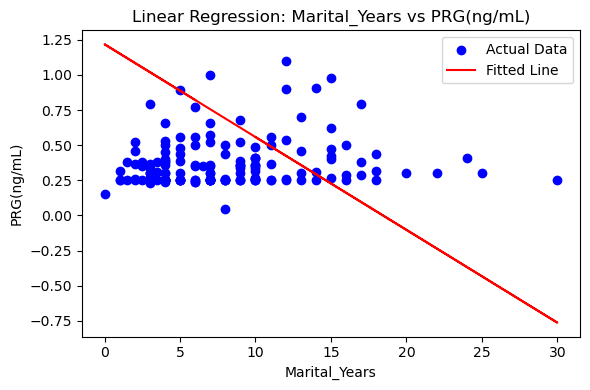

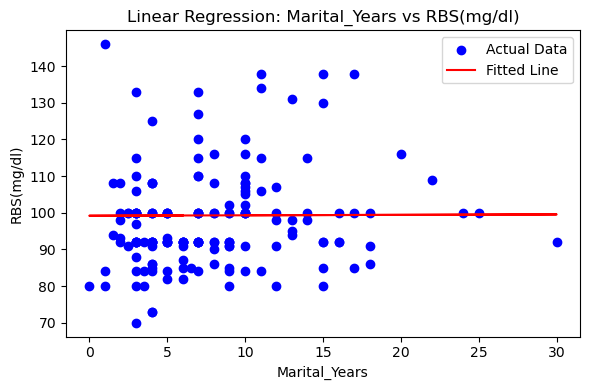

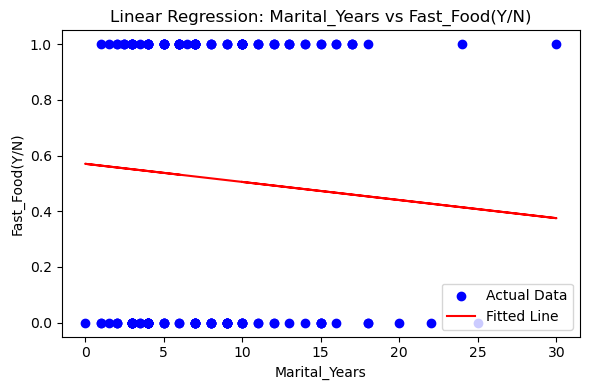

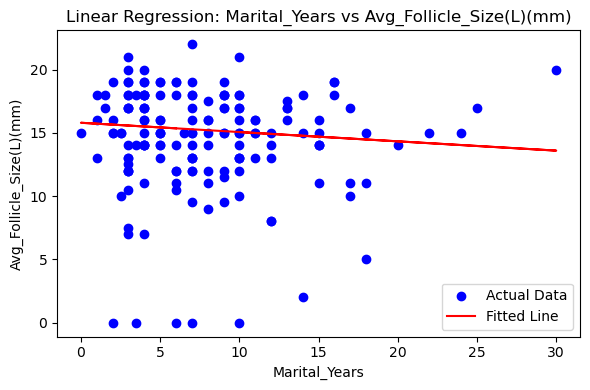

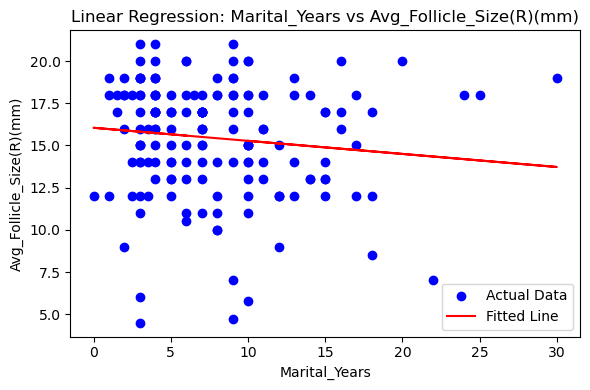

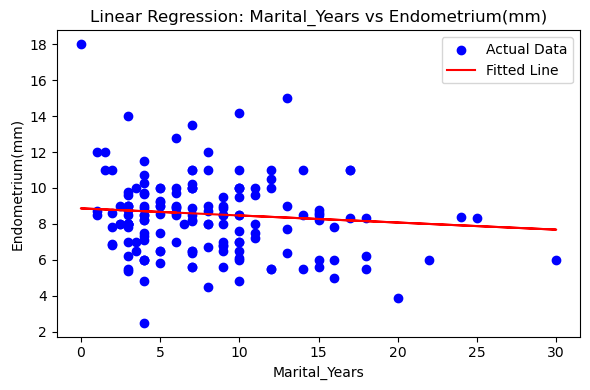

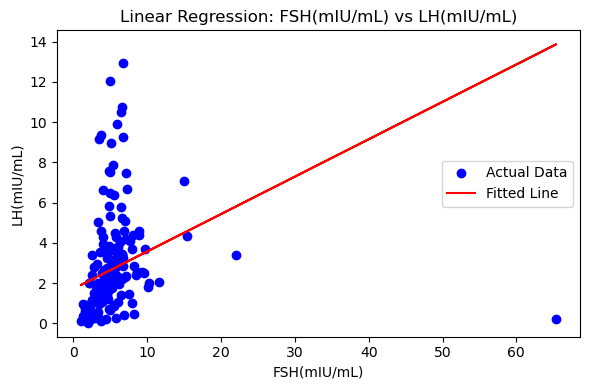

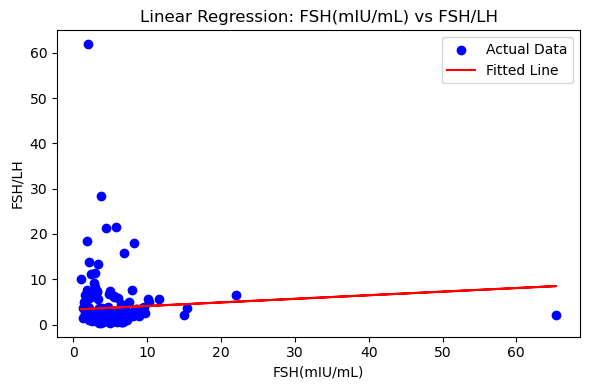

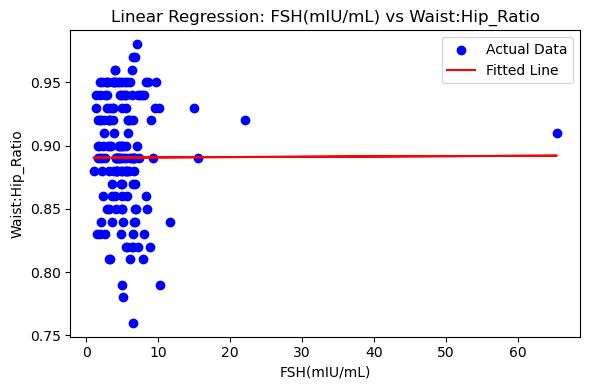

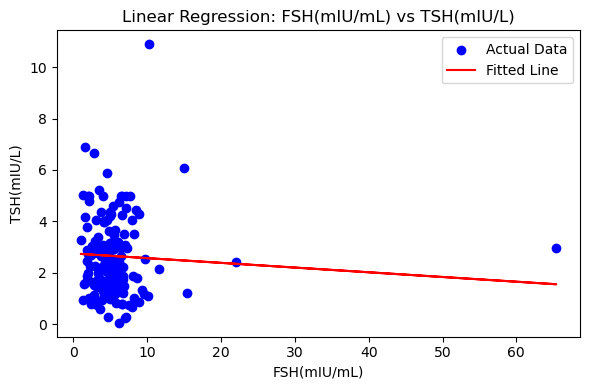

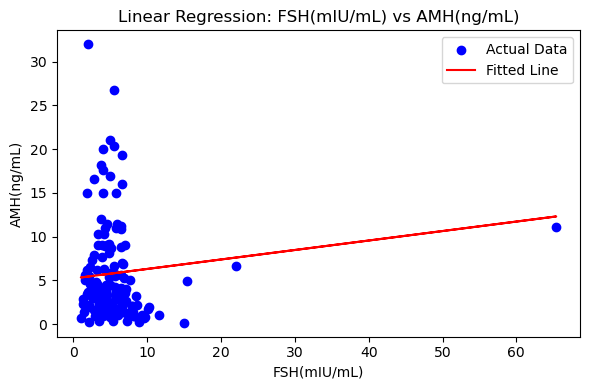

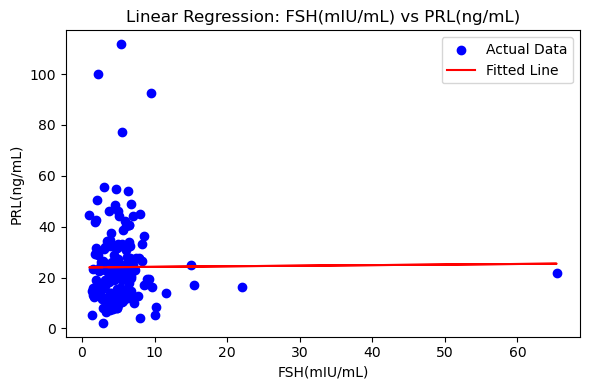

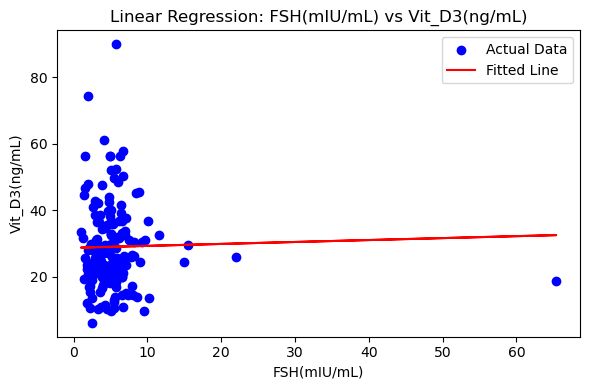

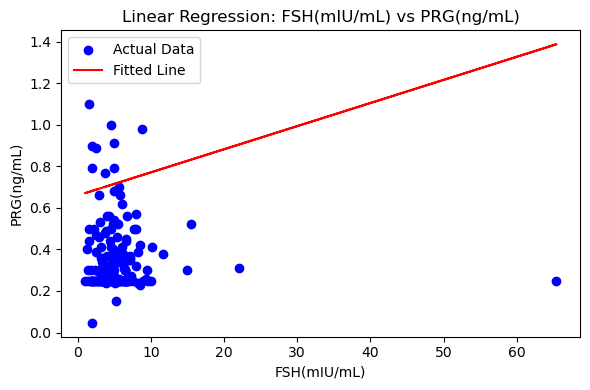

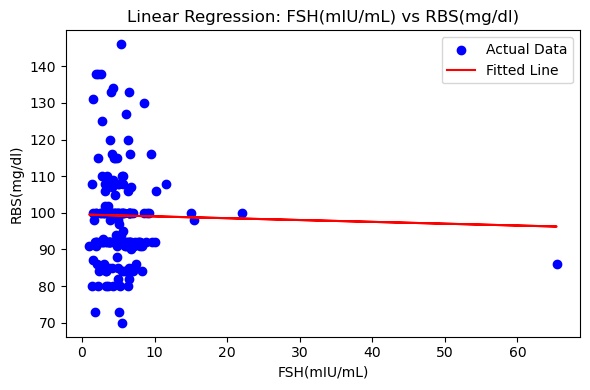

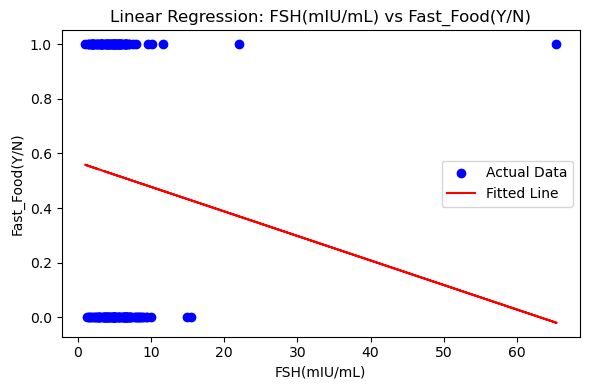

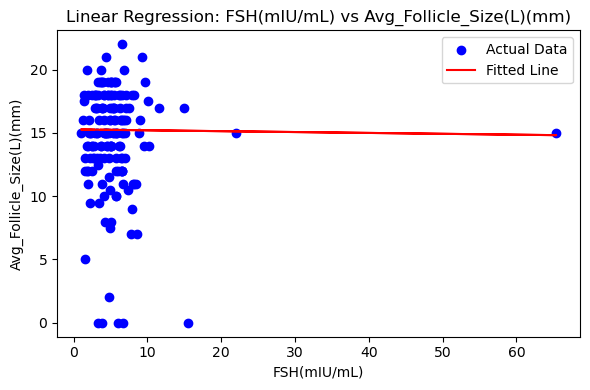

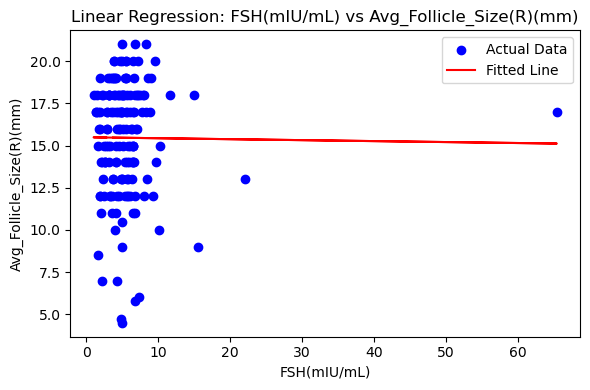

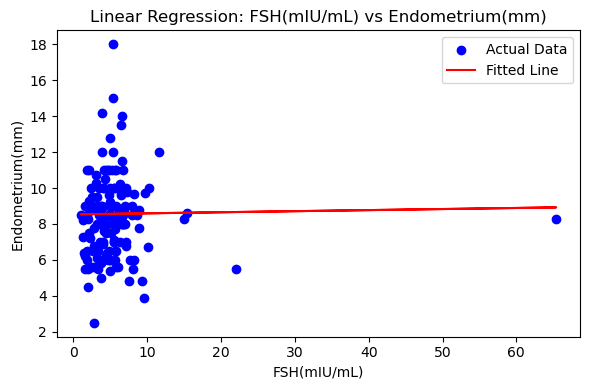

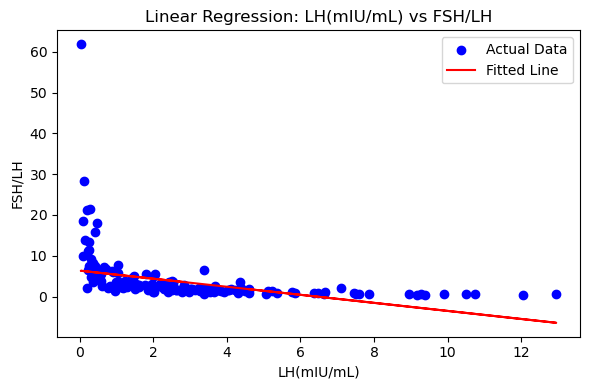

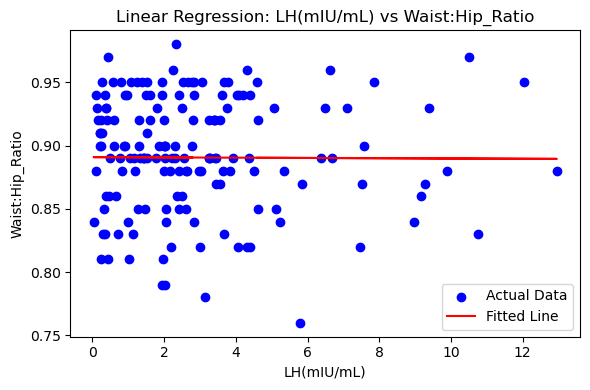

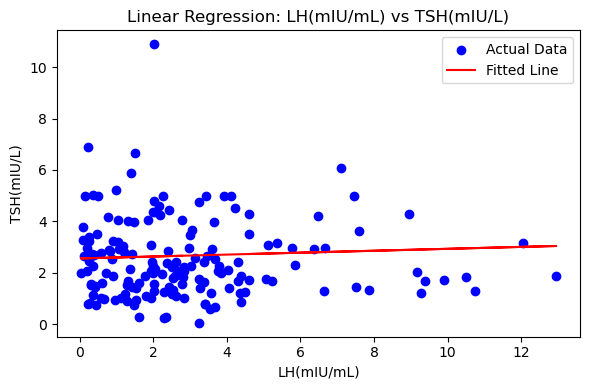

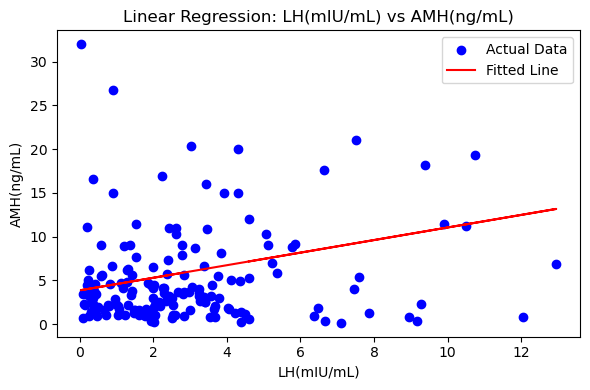

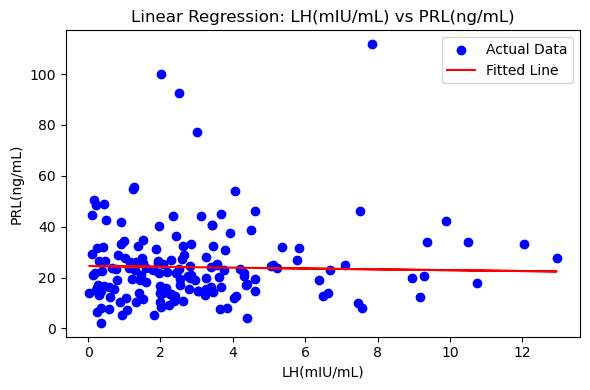

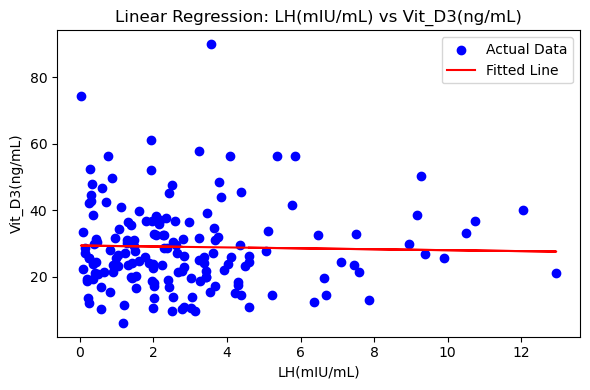

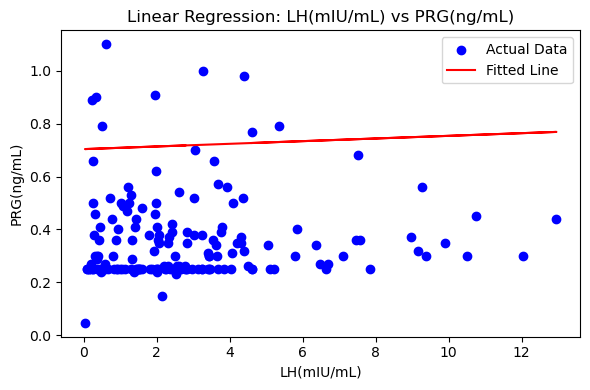

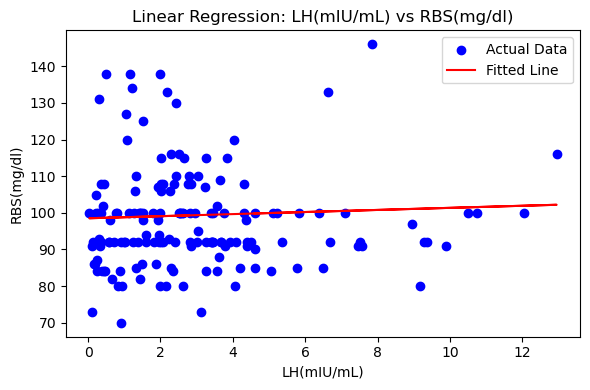

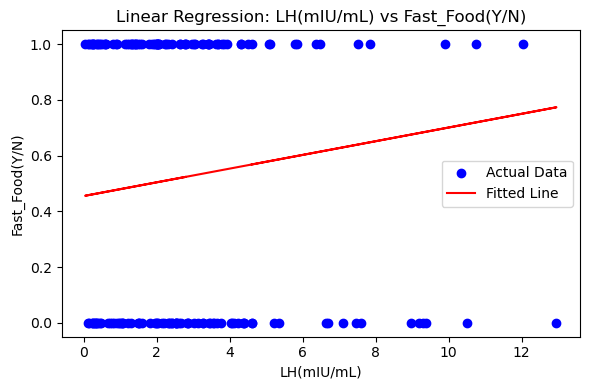

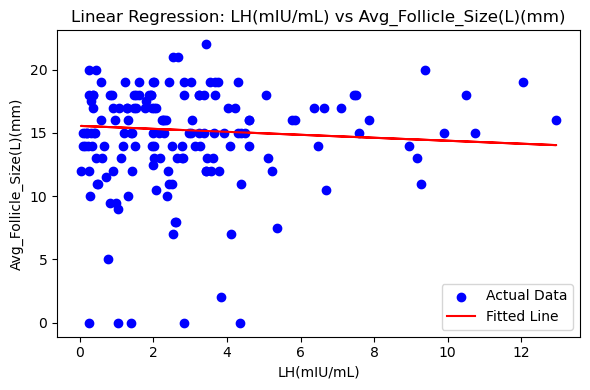

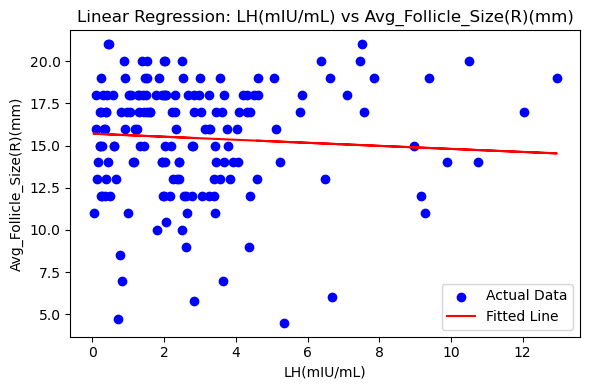

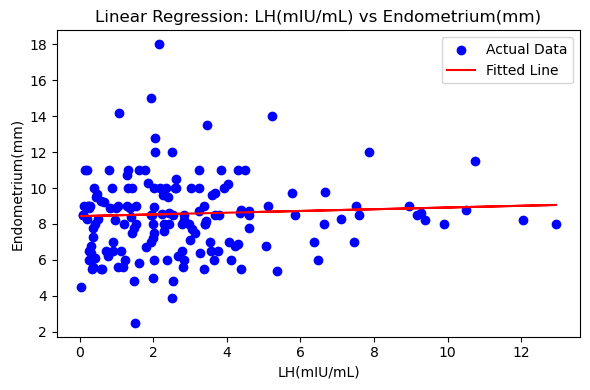

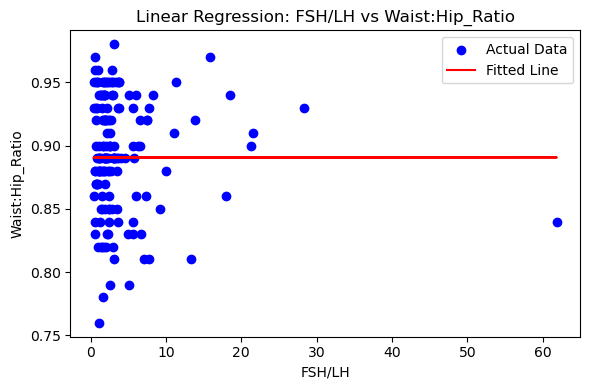

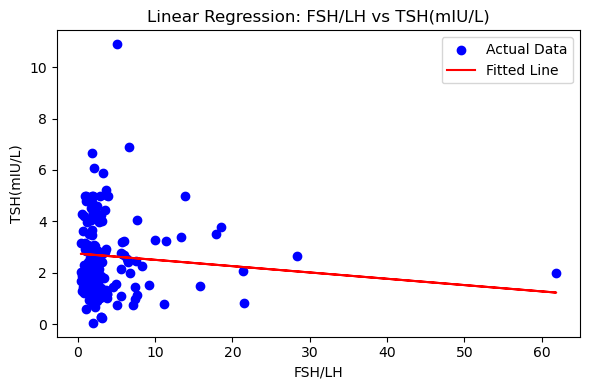

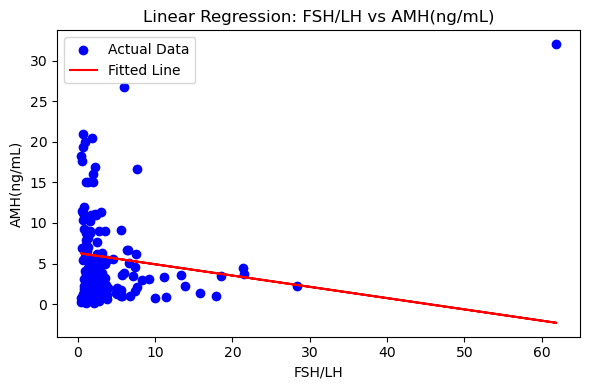

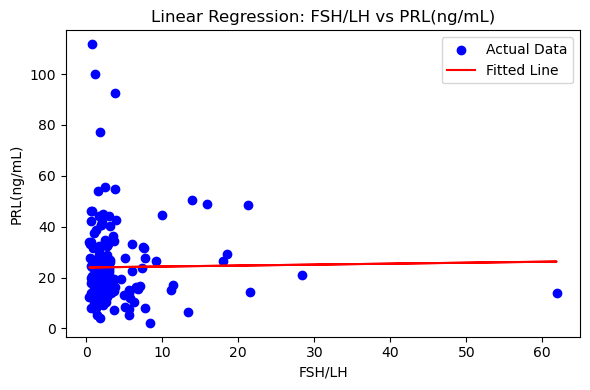

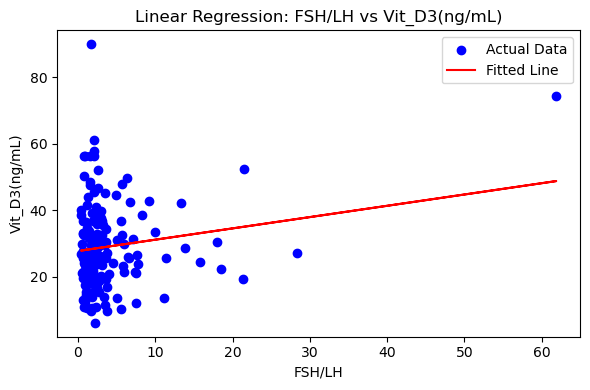

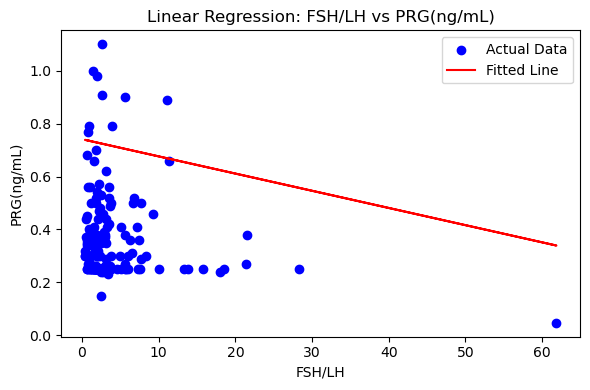

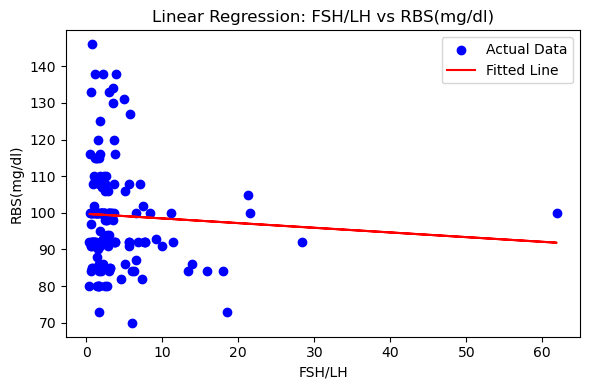

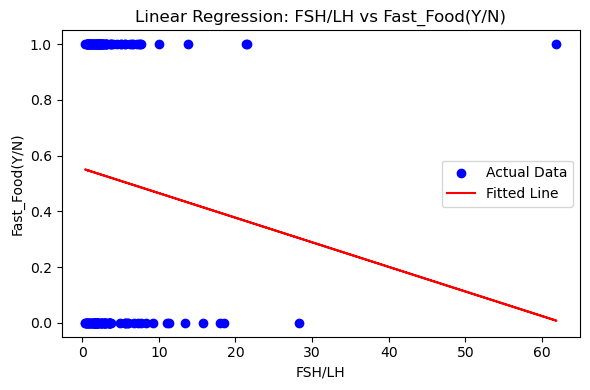

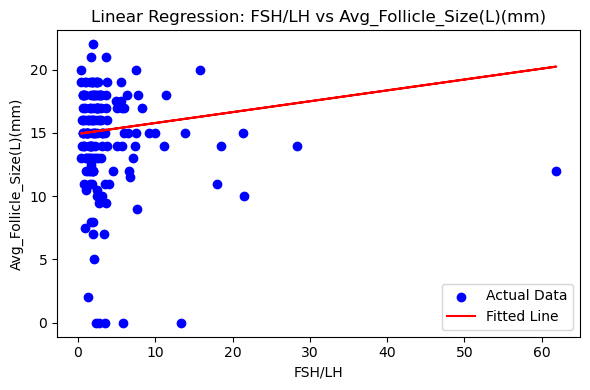

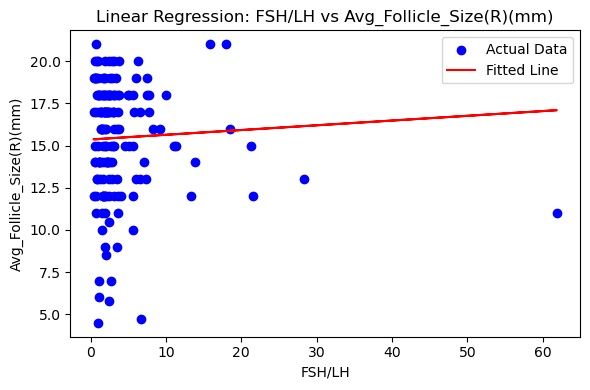

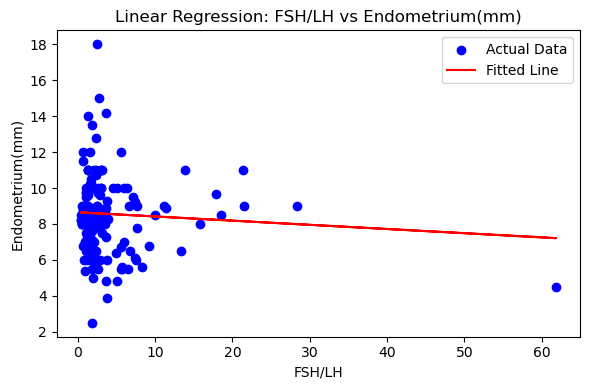

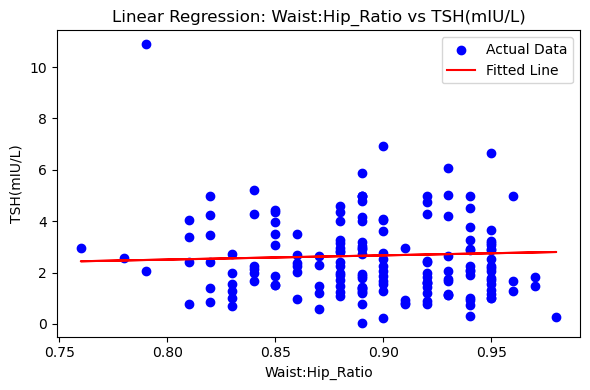

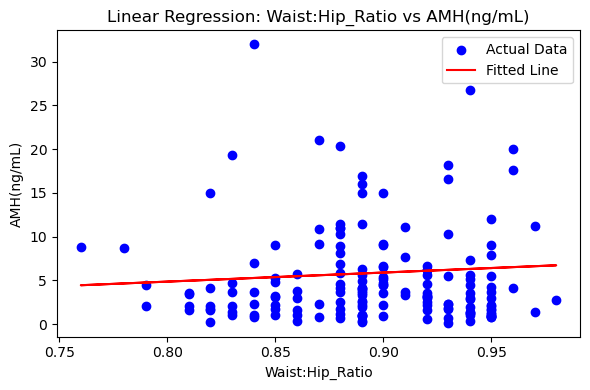

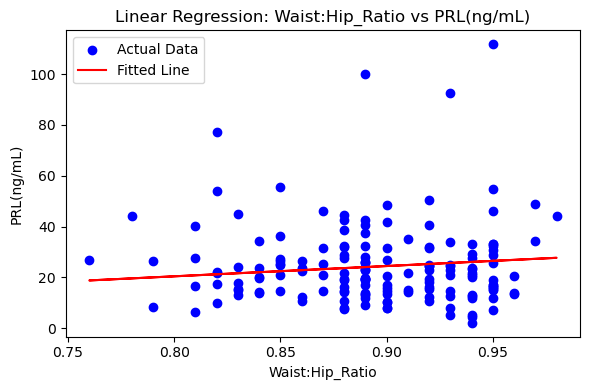

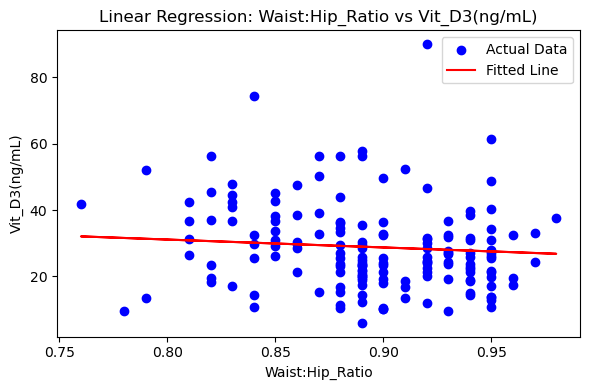

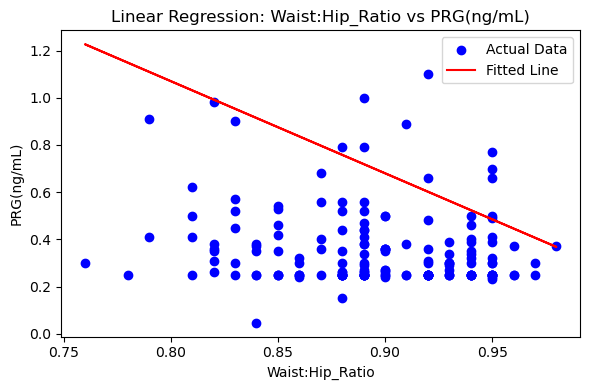

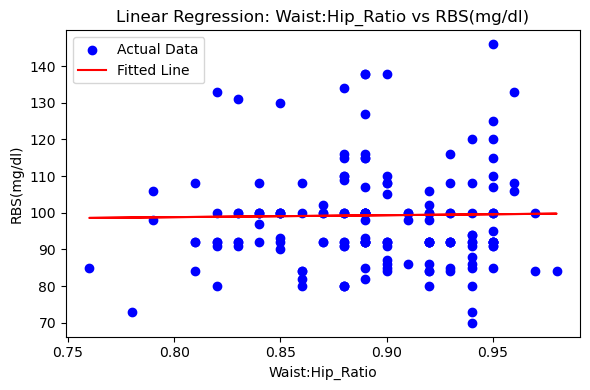

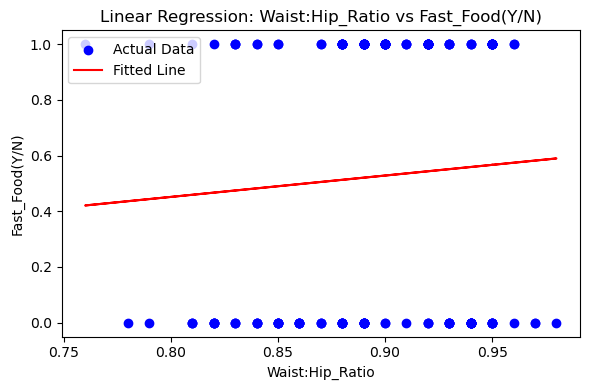

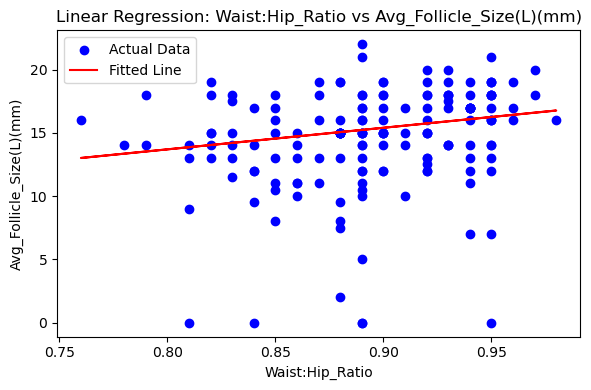

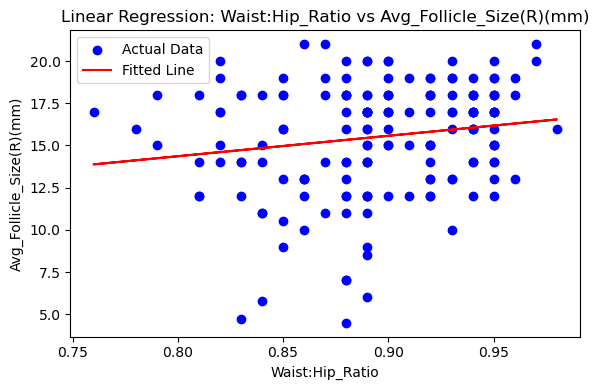

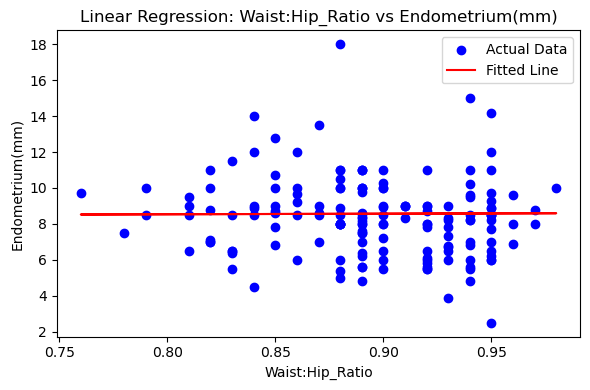

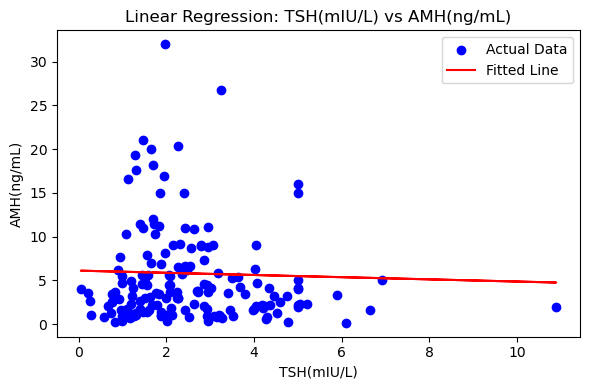

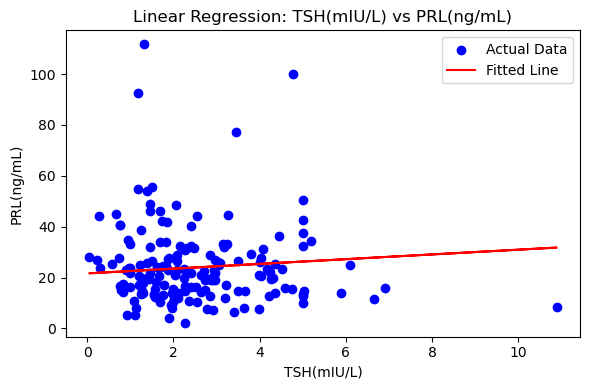

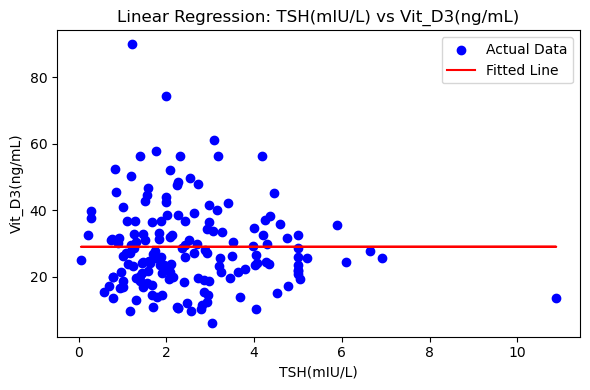

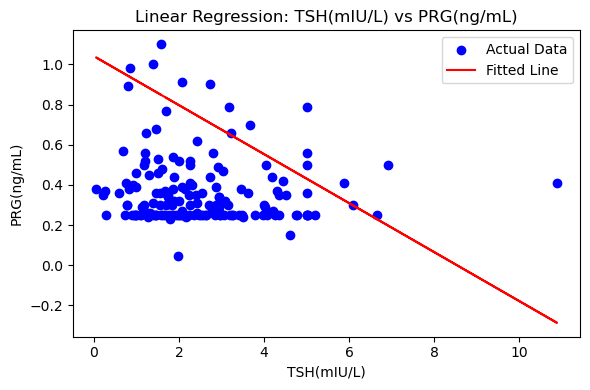

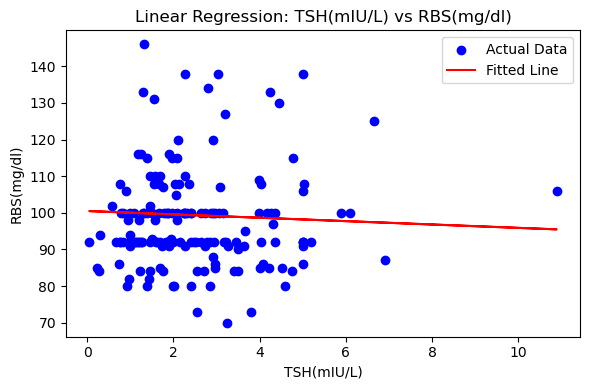

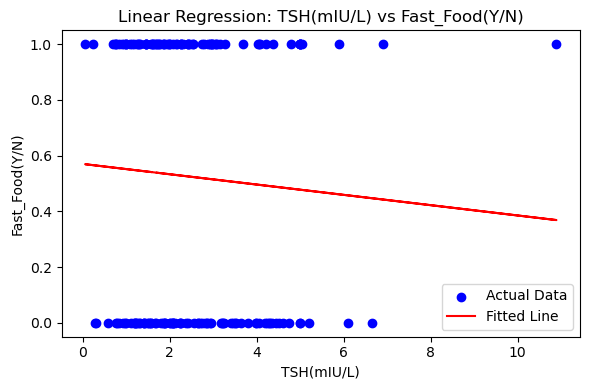

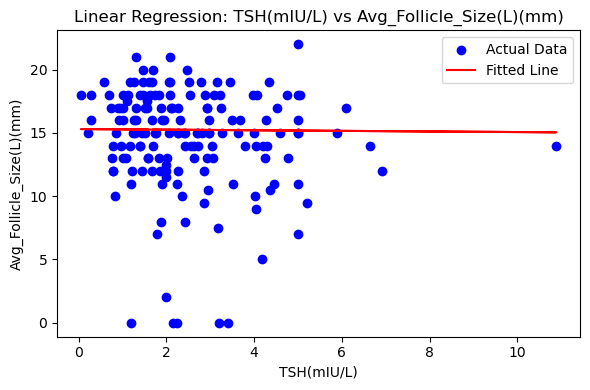

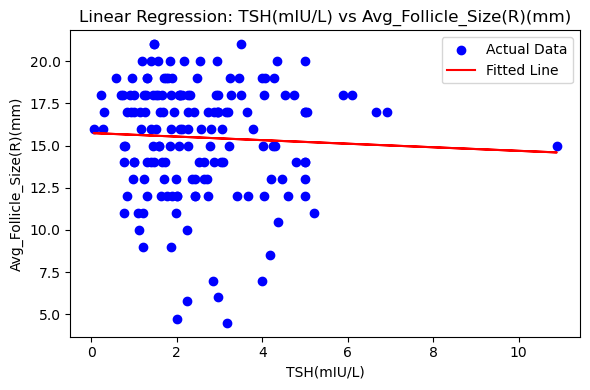

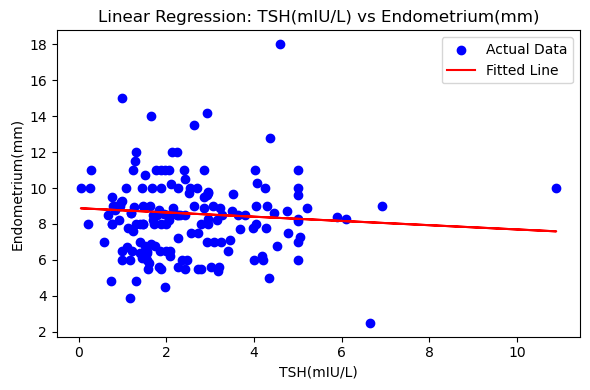

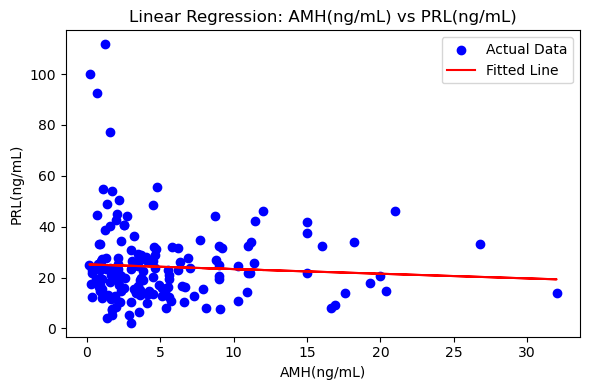

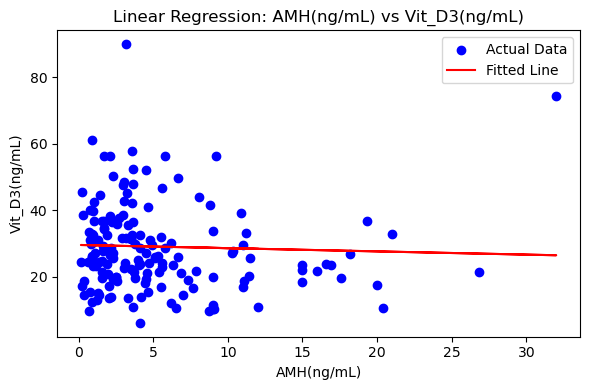

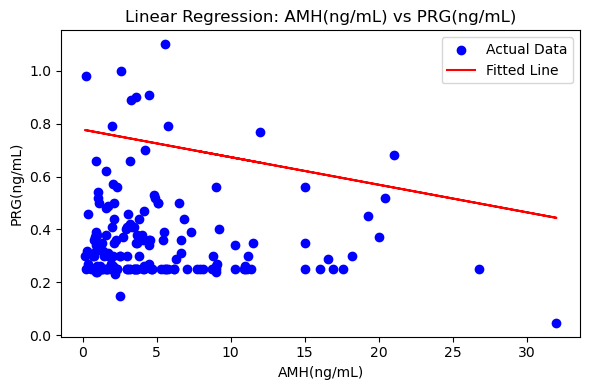

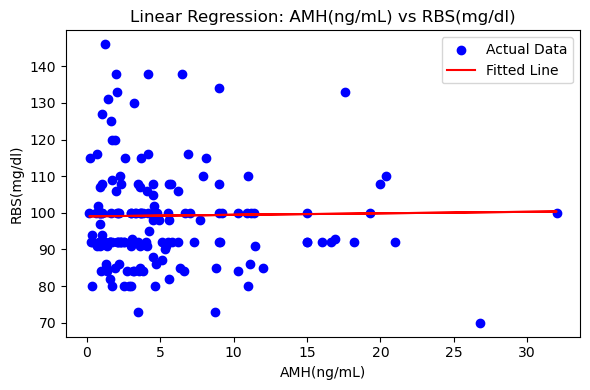

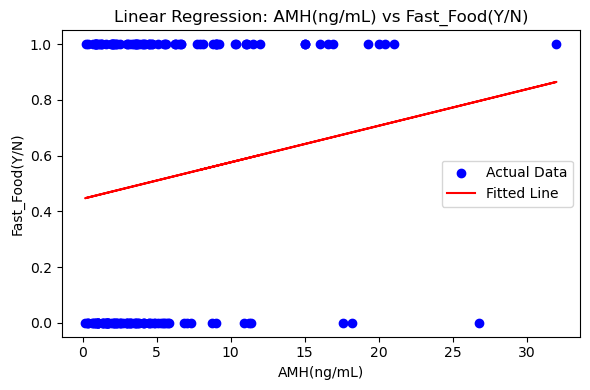

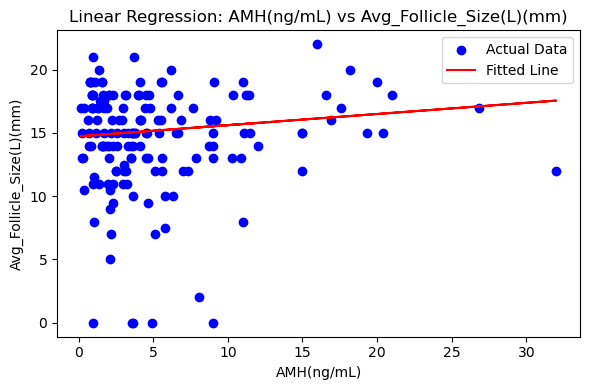

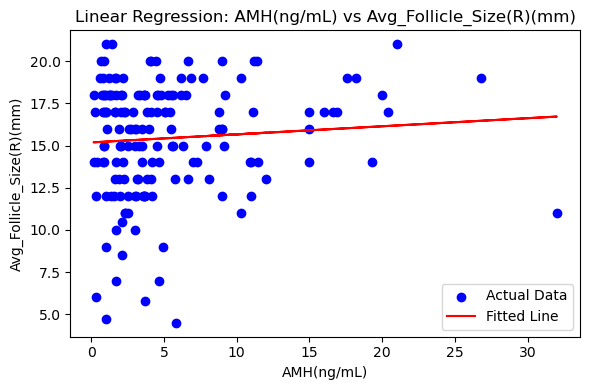

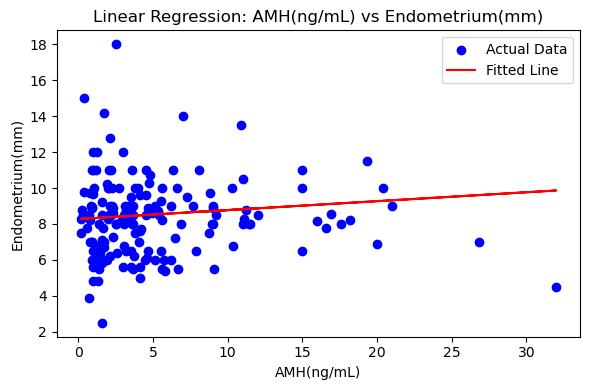

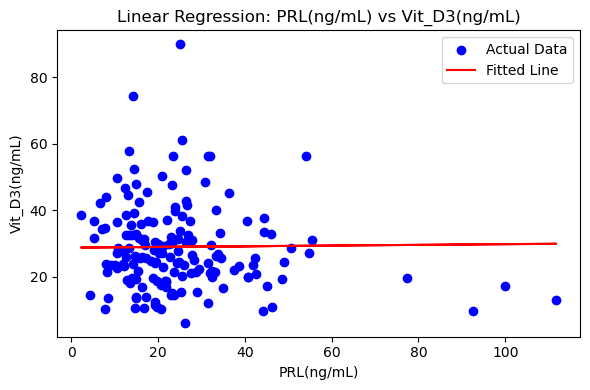

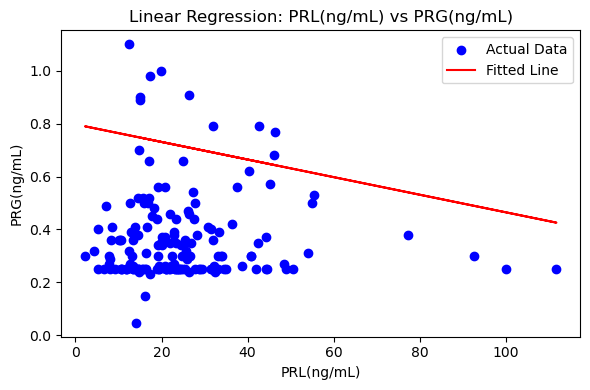

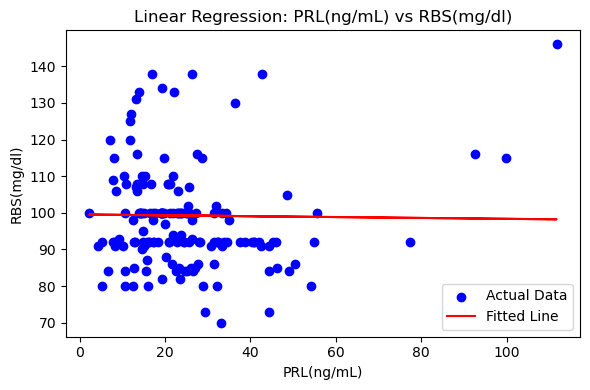

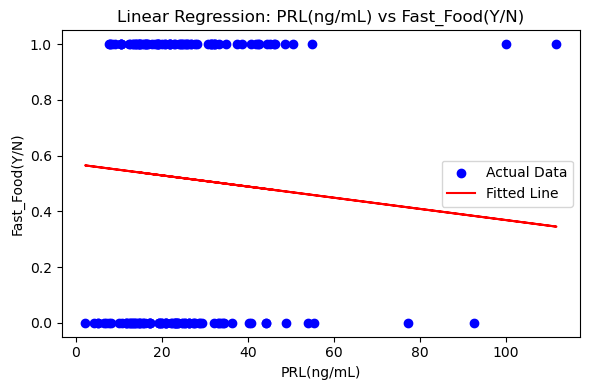

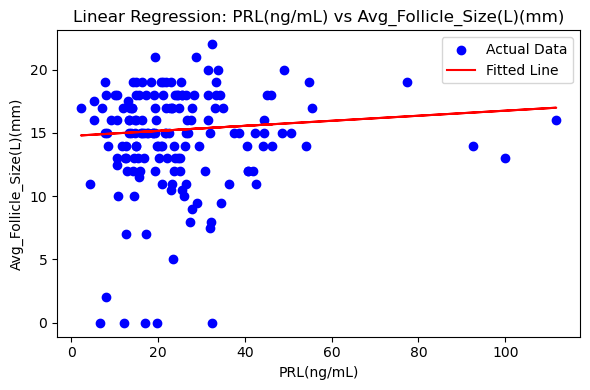

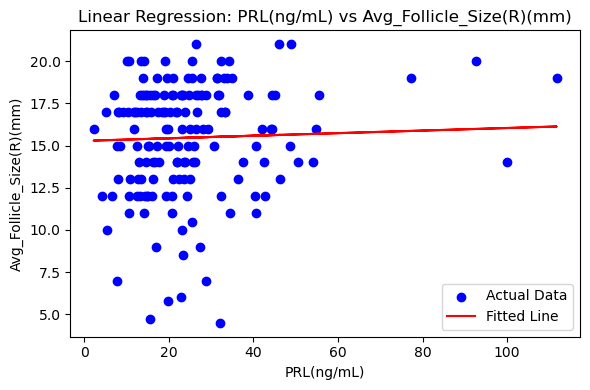

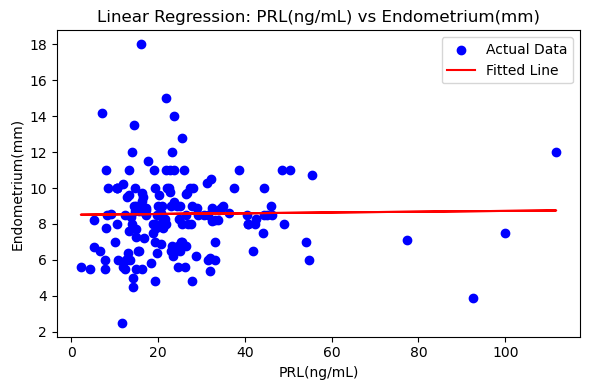

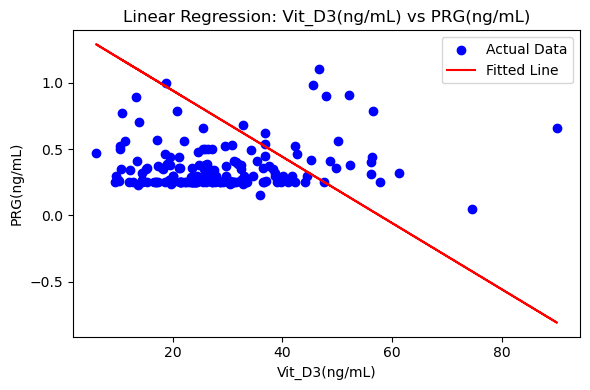

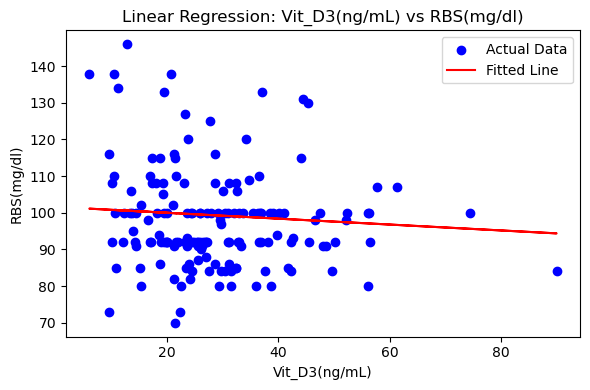

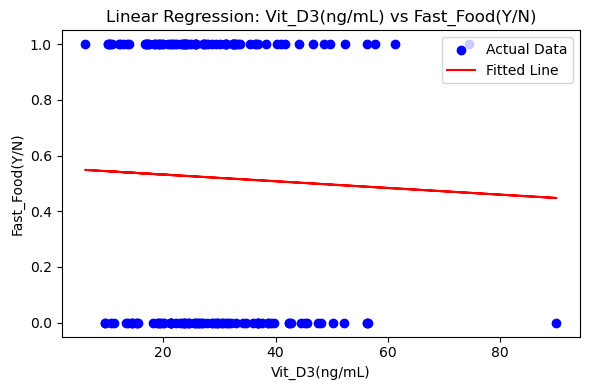

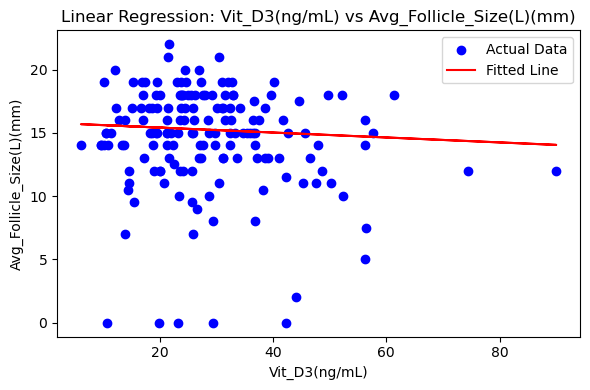

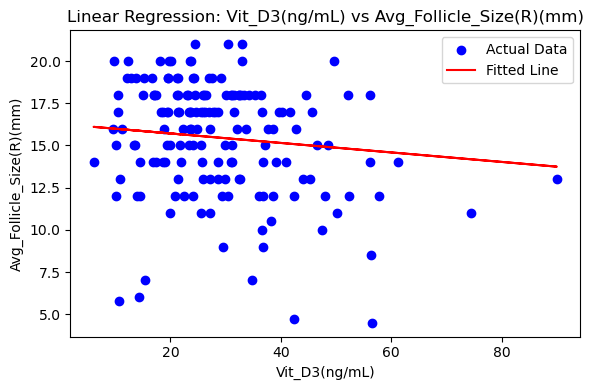

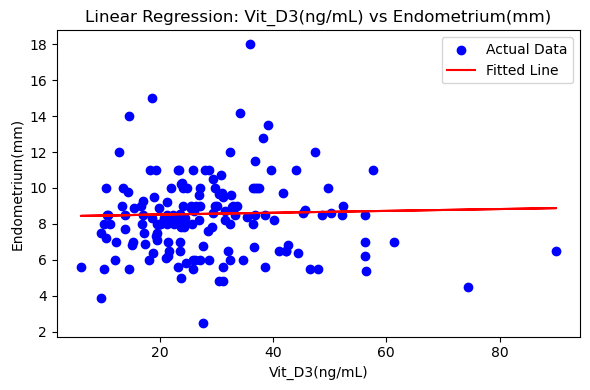

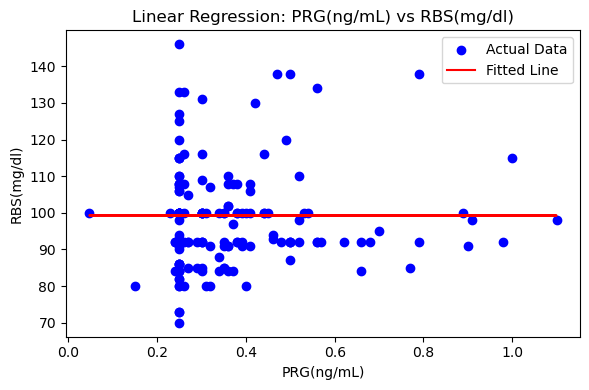

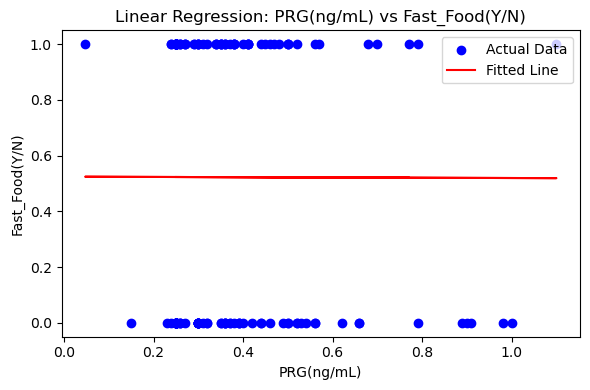

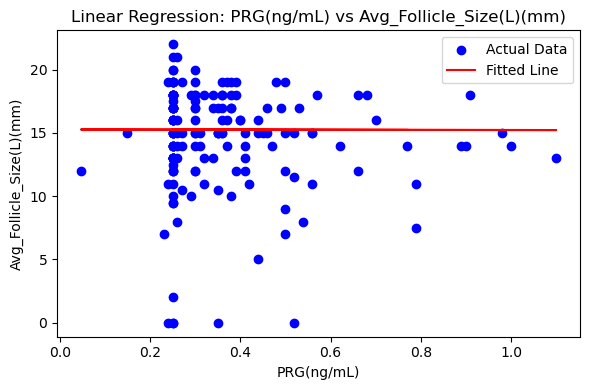

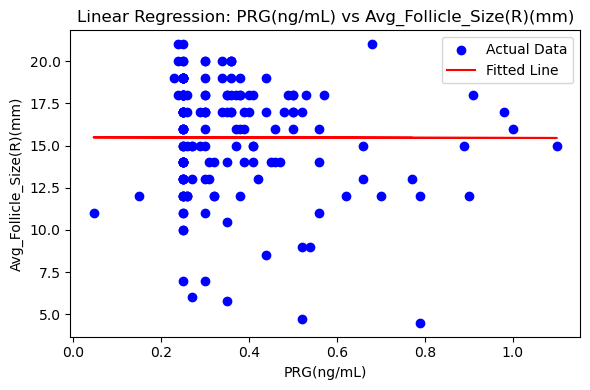

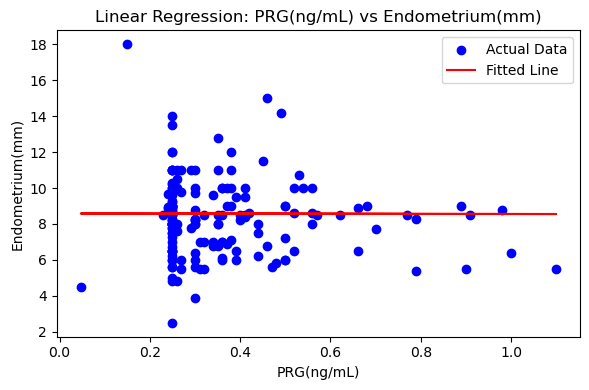

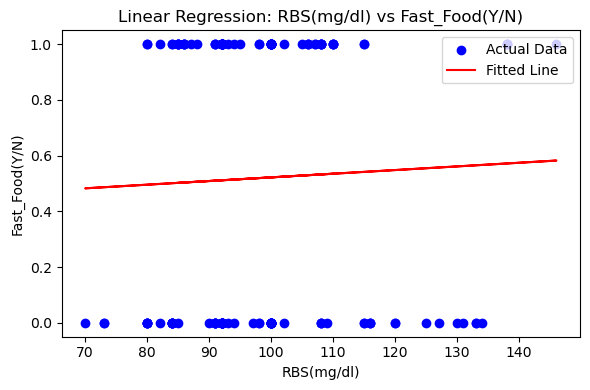

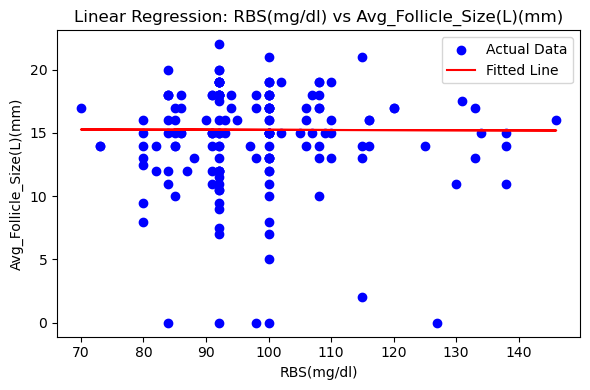

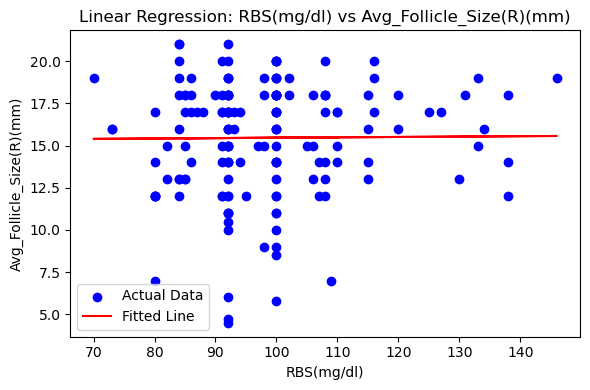

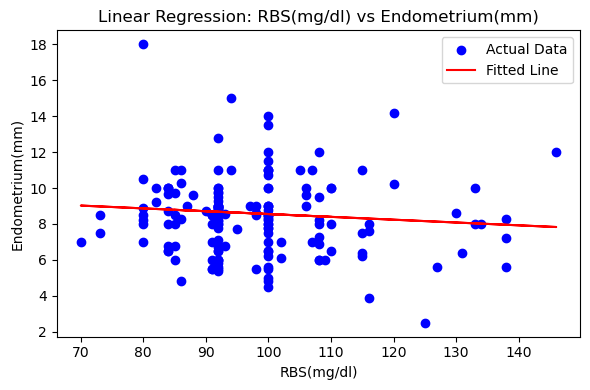

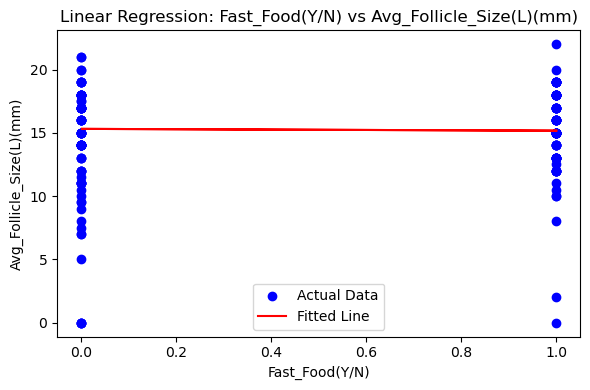

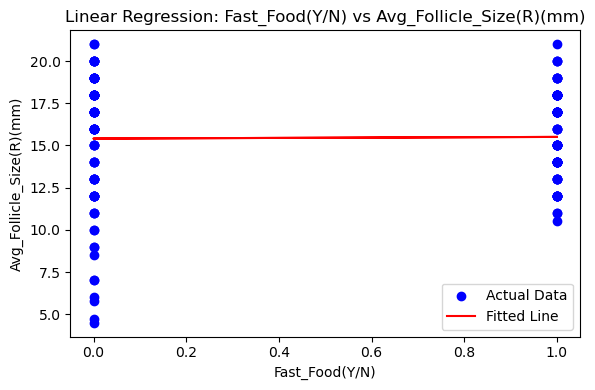

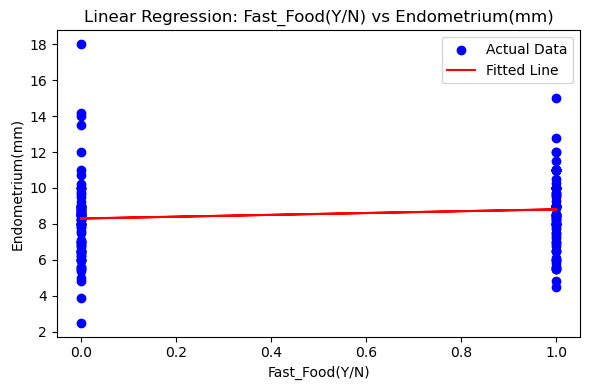

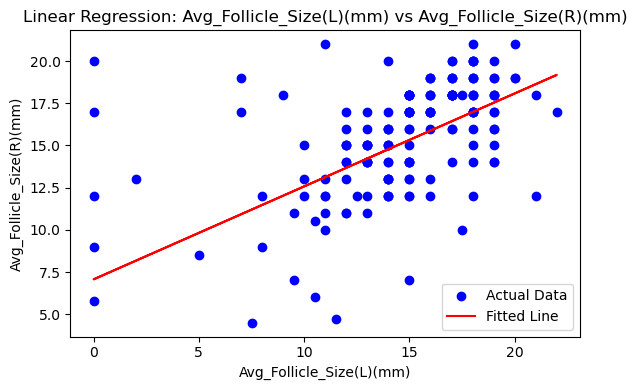

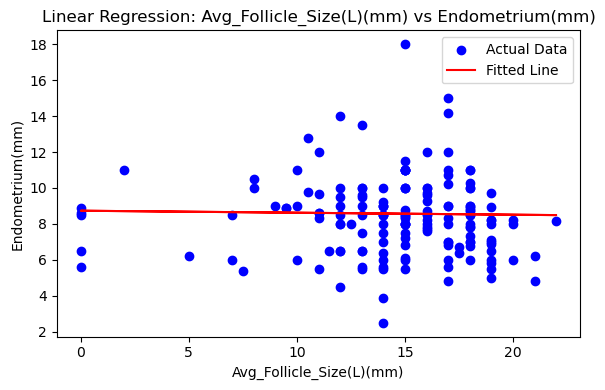

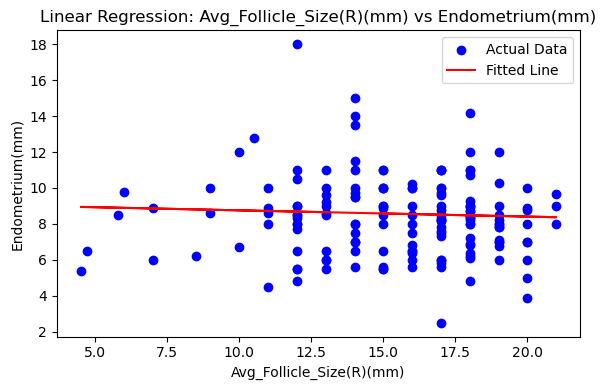

In [10]:
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

continuous_vars = df.select_dtypes(include=['float64']).columns

# Plotting linear regression for all pairs of continuous variables
for var1, var2 in itertools.combinations(continuous_vars, 2):
    X = df[[var1]]
    y = df[var2]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fitting the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Plotting
    plt.figure(figsize=(6, 4))
    plt.scatter(X_test, y_test, color='blue', label='Actual Data')
    plt.plot(X_test, y_pred, color='red', label='Fitted Line')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'Linear Regression: {var1} vs {var2}')
    plt.legend()
    plt.tight_layout()
    plt.show()
